# Tutorial for emgfit package
### Example file: High stats measurement of Ga-62 

The following shows an example analysis with emgfit broken down into the essential steps.

## Importing the package and accessing the documentation 

In [24]:
### Import fit package 
import emgfit as emg

### Getting help:
dir(emg.spectrum) # show all available methods of emgfit spectrum module
help(emg.spectrum.add_peak) # show function docs of add_peak method in spectrum module
# Make use of the function documentation!

# Helpful keyboard shortcuts: 
# - Use TAB to get suggestions for auto-completion of method and variable names
# - Place the cursor inside the brackets of a function/method and press SHIFT + TAB to have a window with the 
#   function/method documention pop up

Help on function add_peak in module emgfit.spectrum:

add_peak(self, x_pos, species='?', m_AME=None, m_AME_error=None, verbose=True)
    Manually add a peak to the spectrum's :attr:`peaks` list.
    
    The position of the peak must be specified with the `x_pos` argument.
    If the peak's ionic species is provided with the `species` argument
    the corresponding AME literature values will be added to the :attr:`peak`.
    Alternatively, user-defined literature values can be provided with the
    `m_AME` and `m_AME_error` arguments. This option is helpful for isomers
    or in case of very recent measurements that haven't entered the AME yet.
    
    Parameters
    ----------
    x_pos : float [u]
        Position of peak to be added.
    species : str, optional
        :attr:`species` label for peak to be added following the :-notation
        (likewise used in MAc). If assigned, :attr:`peak.m_AME`,
         :attr:`peak.m_AME_error` & :attr:`peak.extrapolated` are
         automati

## Import data 
### This creates an emgfit spectrum object

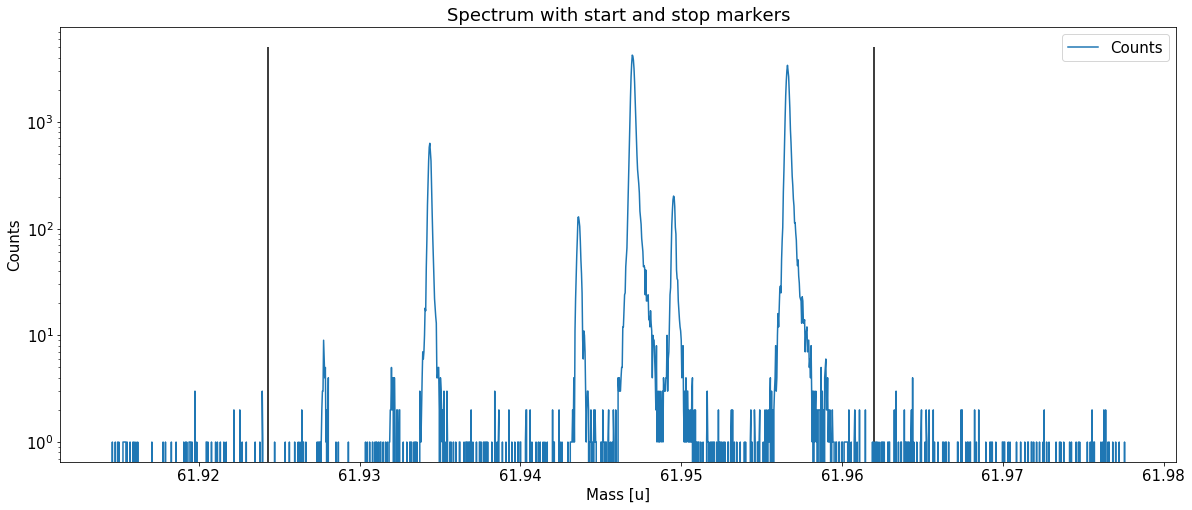

In [36]:
### Import mass data, plot full spectrum and choose fit range
filename = "2019-09-13_004-_006 SUMMED High stats 62Ga" # input file (as exported with MAc's hist-mode)
skiprows = 38 # number of header rows to skip upon data import
m_start = 61.9243 # low-mass cut off
m_stop = 61.962 # high-mass cut off
spec = emg.spectrum(filename+'.txt',m_start,m_stop,skiprows=skiprows)

## Adding peaks to the spectrum 
This can be done with the automatic peak detection (detect_peaks spectrum method) and/or by manually adding peaks (add_peak spectrum method)

All info about the peaks is compiled in the peak properties table. The table's left-most column shows the respective peak indeces.

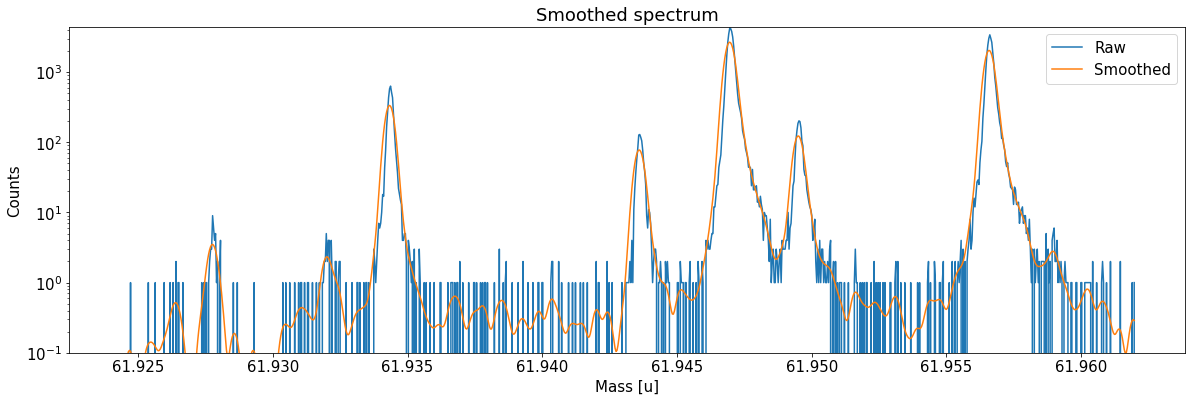

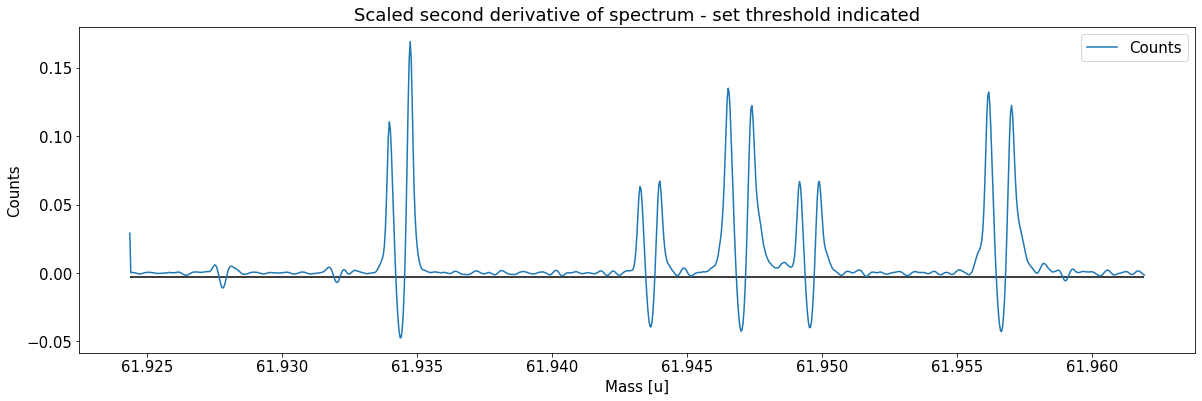

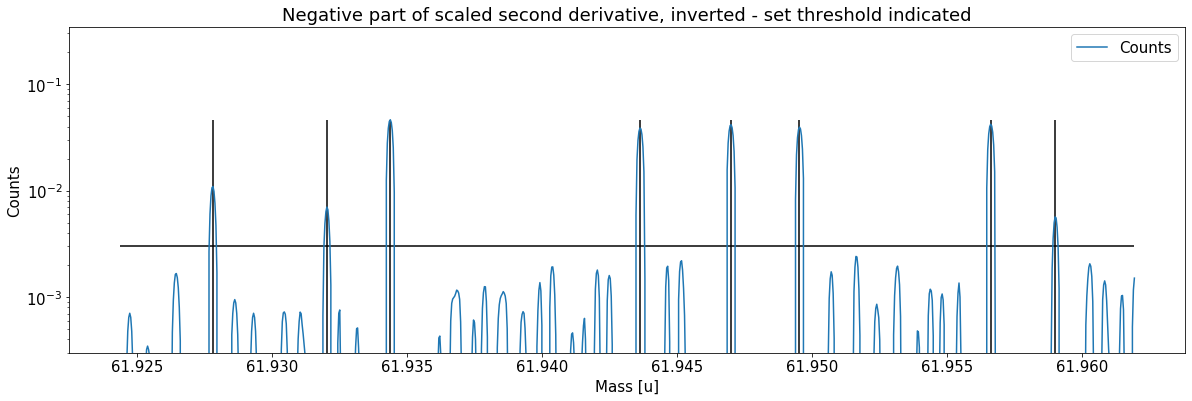

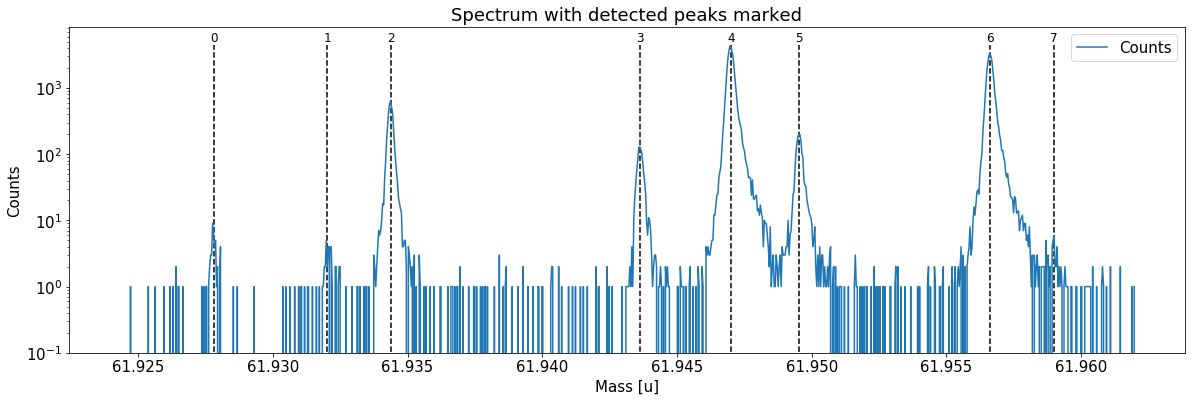

Peak properties table after peak detection:


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,61.932021,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,61.934369,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
3,61.943618,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,61.946994,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,61.949527,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
6,61.956611,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None
7,61.958997,?,-,None,None,False,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [37]:
### Detect peaks and add them to spectrum object 'spec'
spec.detect_peaks() # automatic peak detection
#spec.add_peak(61.925,species='?') # manually add a peak at x_pos = 61.925u
#spec.remove_peak(peak_index=0) # manually remove the peak with index 0 

## Assign the identified species to the peaks and add comments (OPTIONAL)

In [38]:
spec.assign_species(['Ni62:-1e','Cu62:-1e',None,'Ga62:-1e','Ti46:O16:-1e','Sc46:O16:-1e','Ca43:F19:-1e',None])
spec.add_peak_comment('Non-isobaric',peak_index=2)
spec.show_peak_properties() # check the changes by printing the peak properties table

Species of peak 0 assigned as Ni62:-1e
Species of peak 1 assigned as Cu62:-1e
Species of peak 3 assigned as Ga62:-1e
Species of peak 4 assigned as Ti46:O16:-1e
Species of peak 5 assigned as Sc46:O16:-1e
Species of peak 6 assigned as Ca43:F19:-1e
Comment of peak 2 was changed to:  Non-isobaric


,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
1,61.932021,Cu62:-1e,-,61.932046,6.940000e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
2,61.934369,?,Non-isobaric,NaN,NaN,False,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
4,61.946994,Ti46:O16:-1e,-,61.946993,1.760001e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
6,61.956611,Ca43:F19:-1e,-,61.956621,2.440018e-07,False,None,None,None,None,None,None,None,None,None,None,62.0,None,None,None
7,61.958997,?,-,NaN,NaN,False,None,None,None,None,None,None,None,None,None,None,NaN,None,None,None


## Select the ideal Hyper-EMG tail order and perform the peak-shape calibration 
It is recommended that the peak-shape calibration is done with a chi-squared fit (default) since this yields more robust results and more trusworthy parameter uncertainty estimates.


##### Determine optimal tail order #####


##### Fitting data with Gaussian #####-----------------------------------------------------------------------------------------



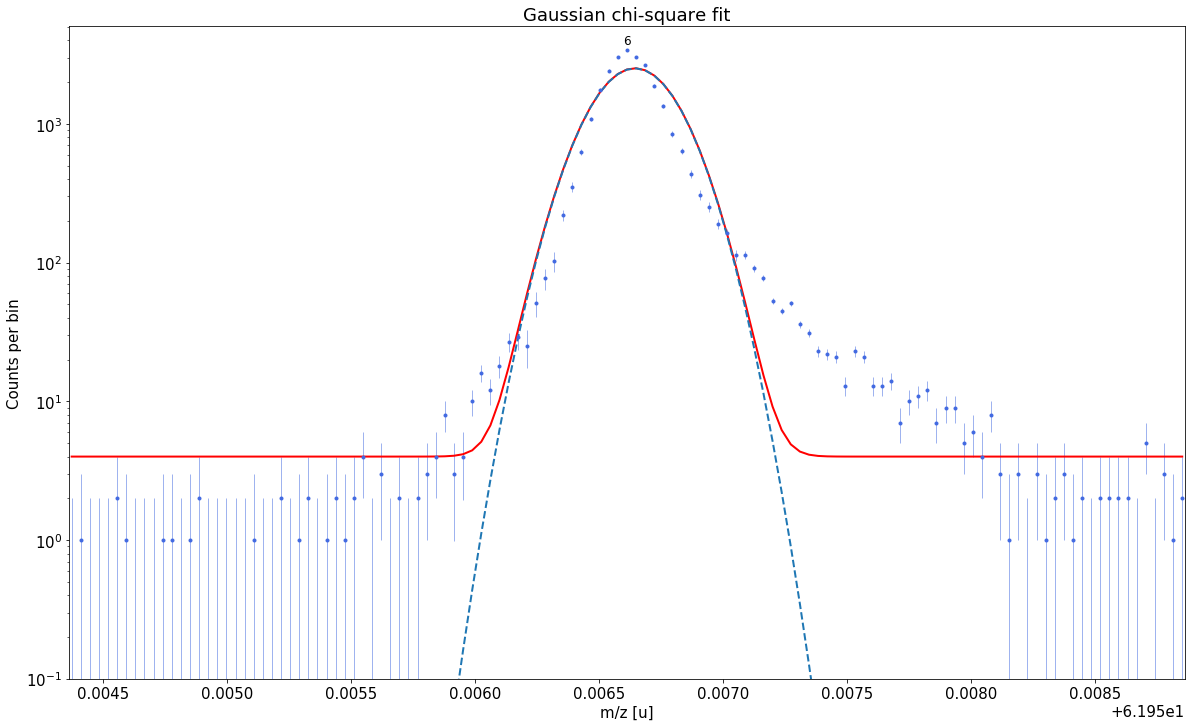

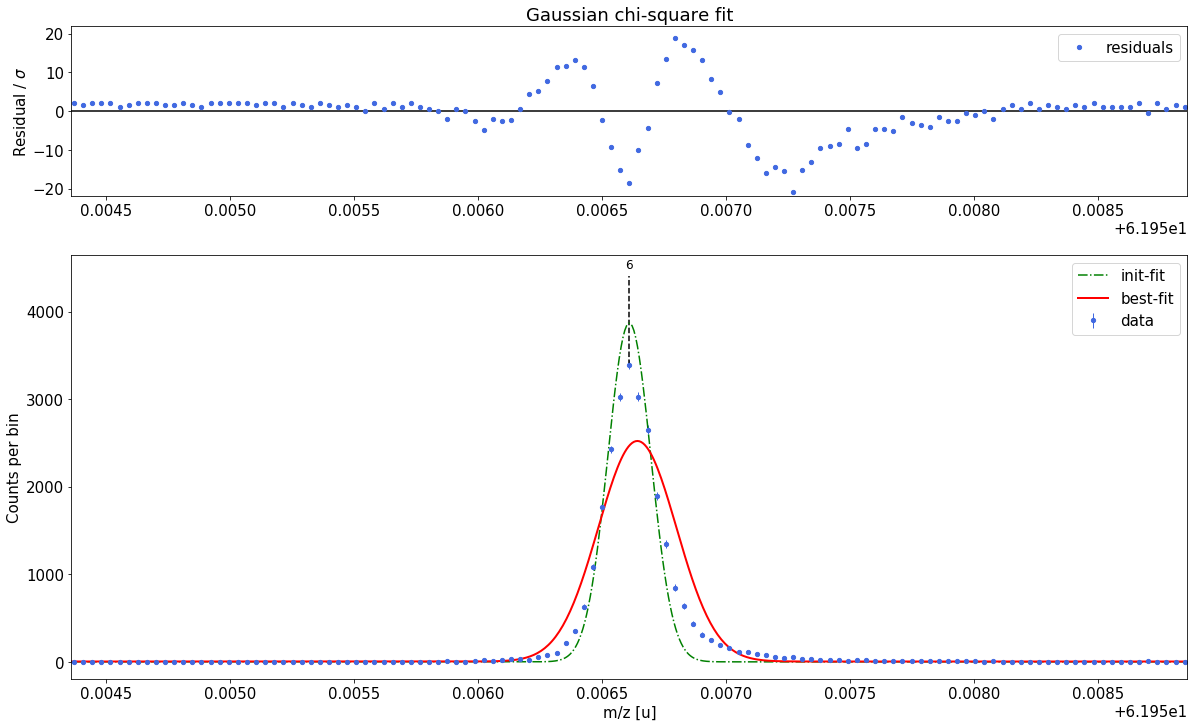


Gaussian-fit yields reduced chi-square of: 45.57 +- 0.13


##### Fitting data with emg01 #####-----------------------------------------------------------------------------------------



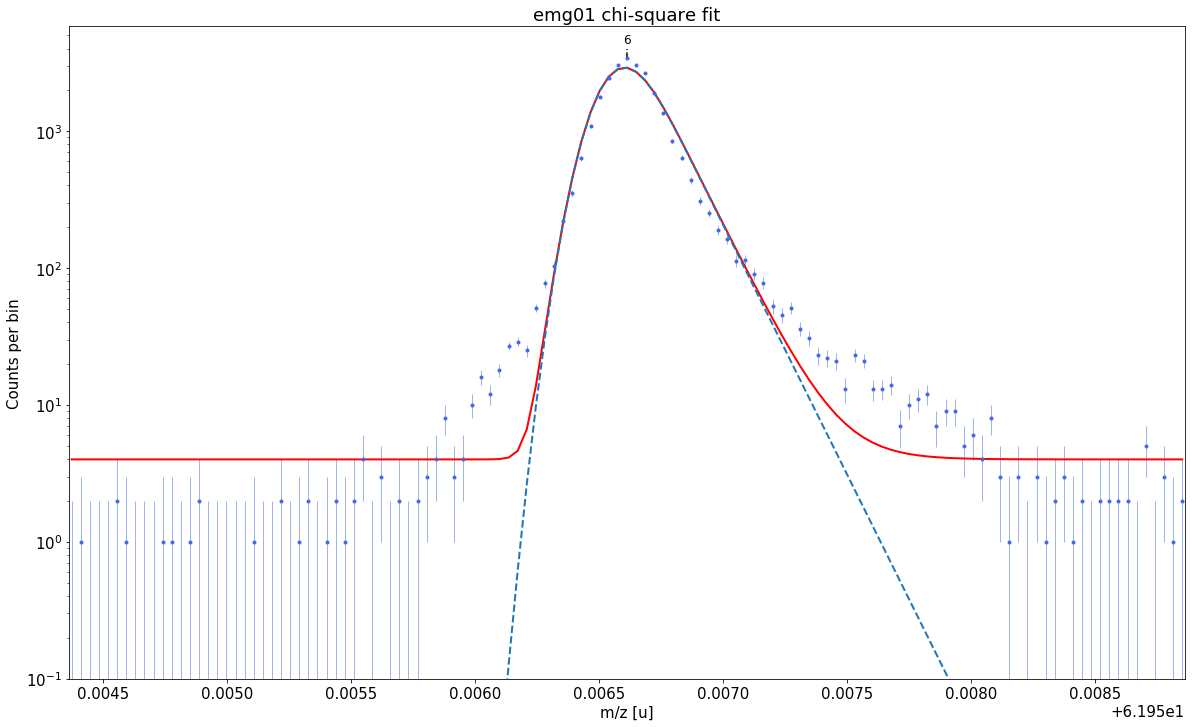

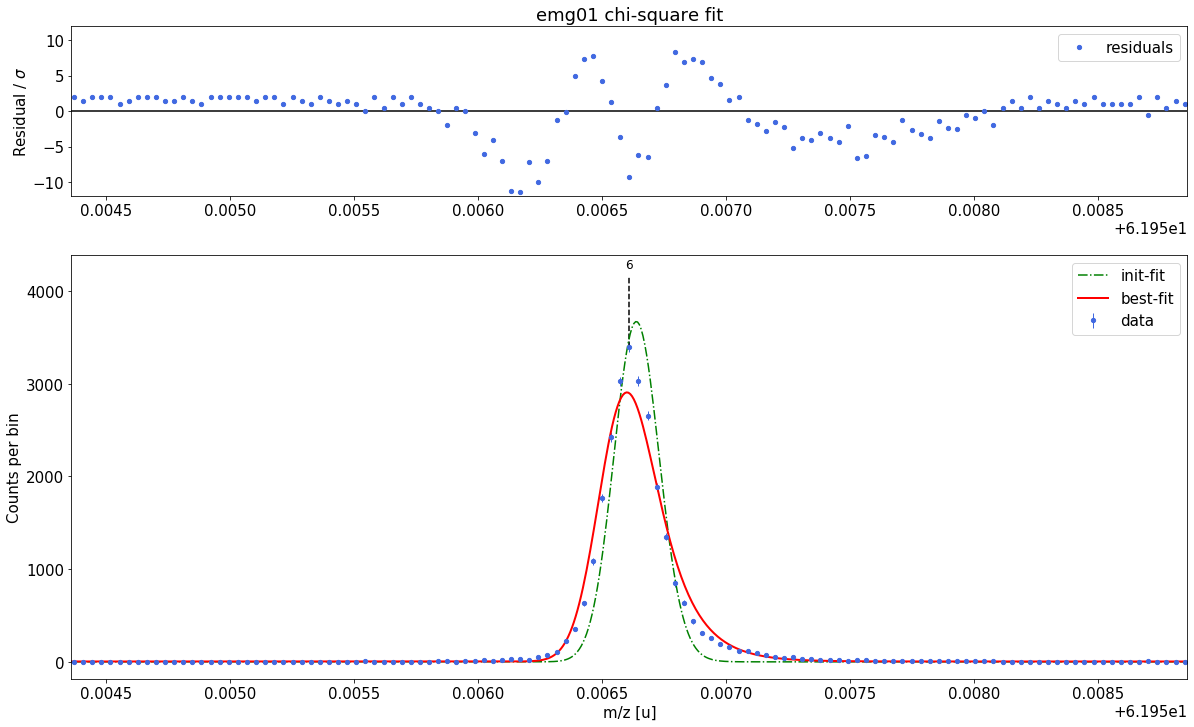


emg01-fit yields reduced chi-square of: 13.79 +- 0.13


##### Fitting data with emg10 #####-----------------------------------------------------------------------------------------



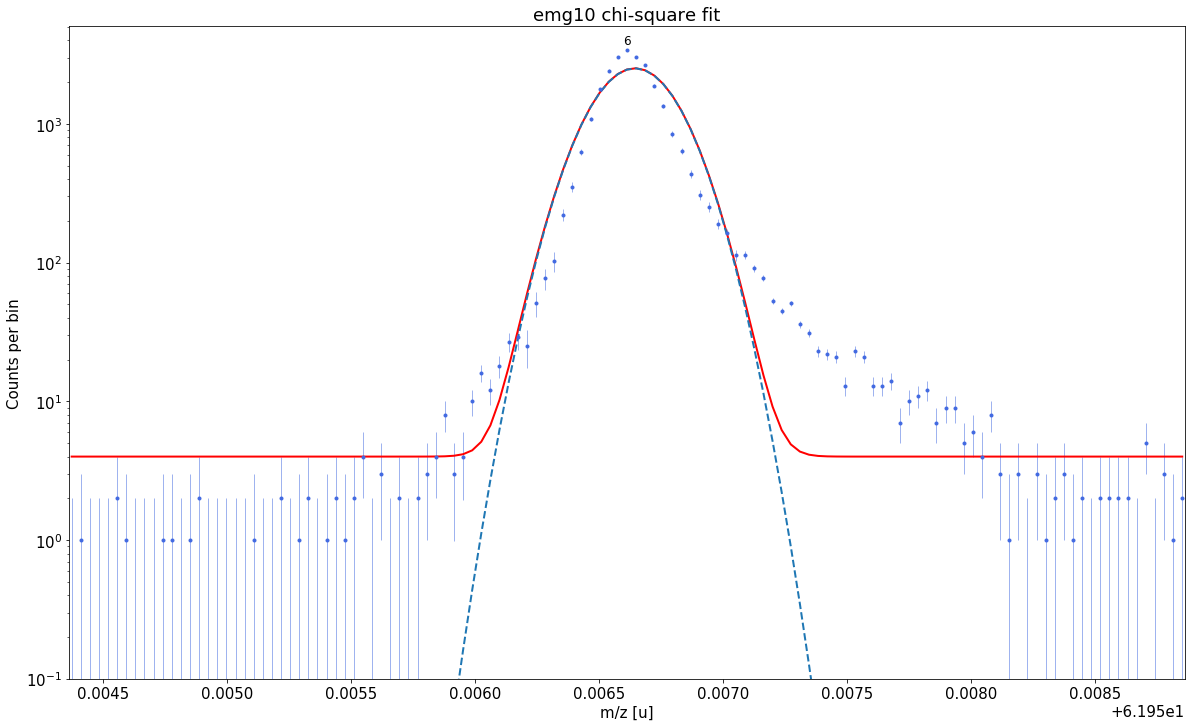

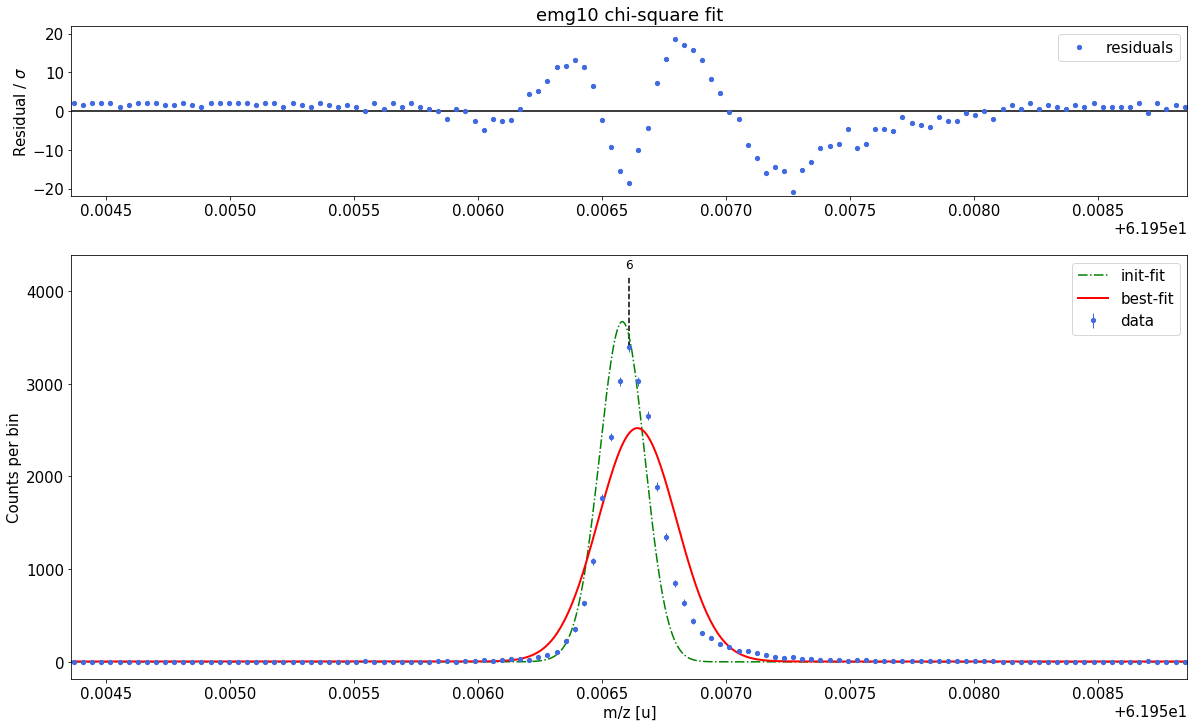


emg10-fit yields reduced chi-square of: 45.96 +- 0.13


##### Fitting data with emg11 #####-----------------------------------------------------------------------------------------



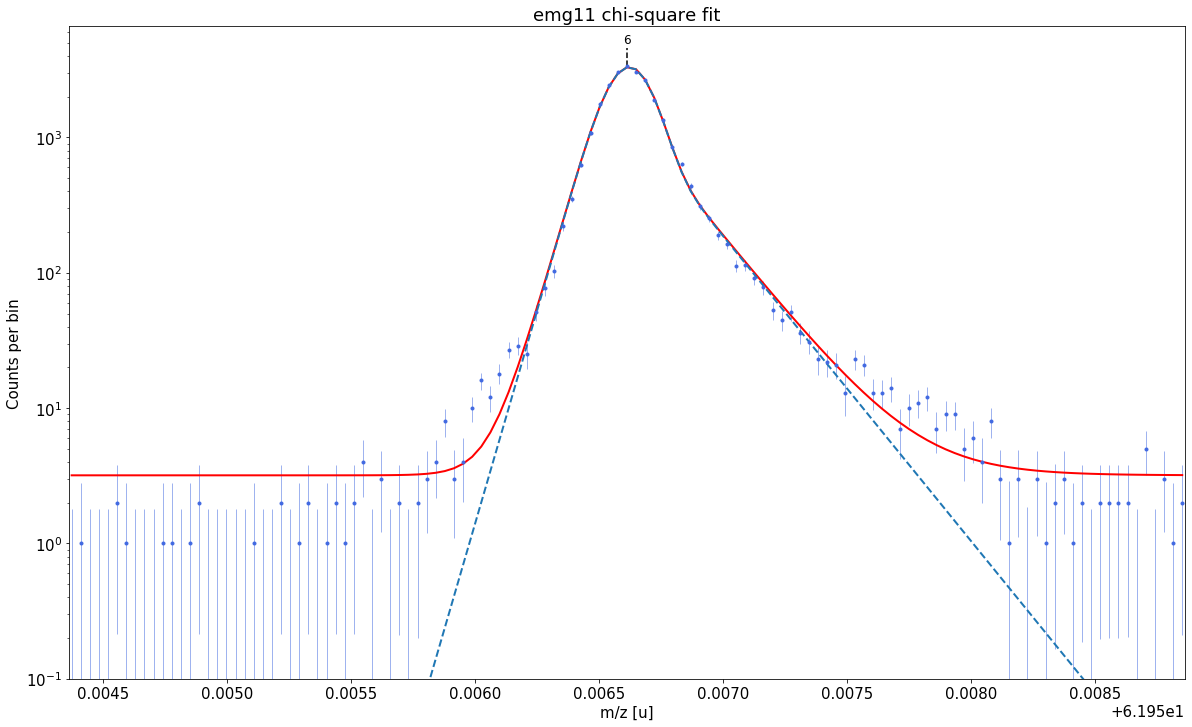

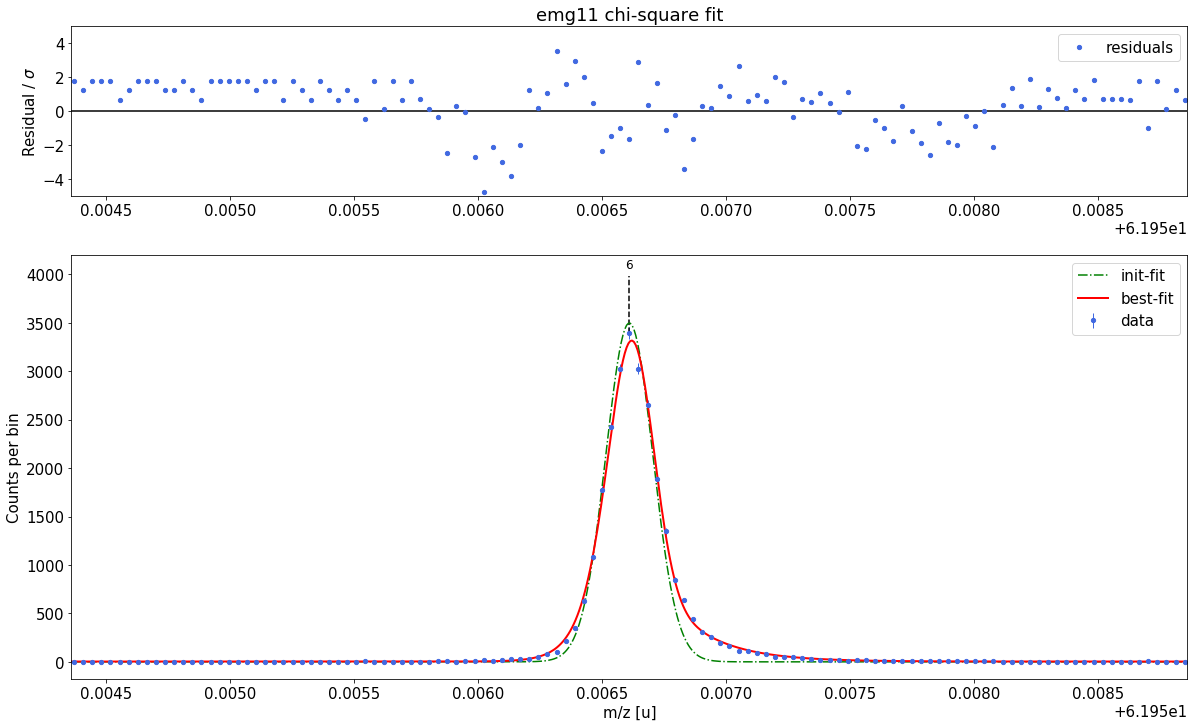


emg11-fit yields reduced chi-square of: 2.6 +- 0.13


##### Fitting data with emg12 #####-----------------------------------------------------------------------------------------



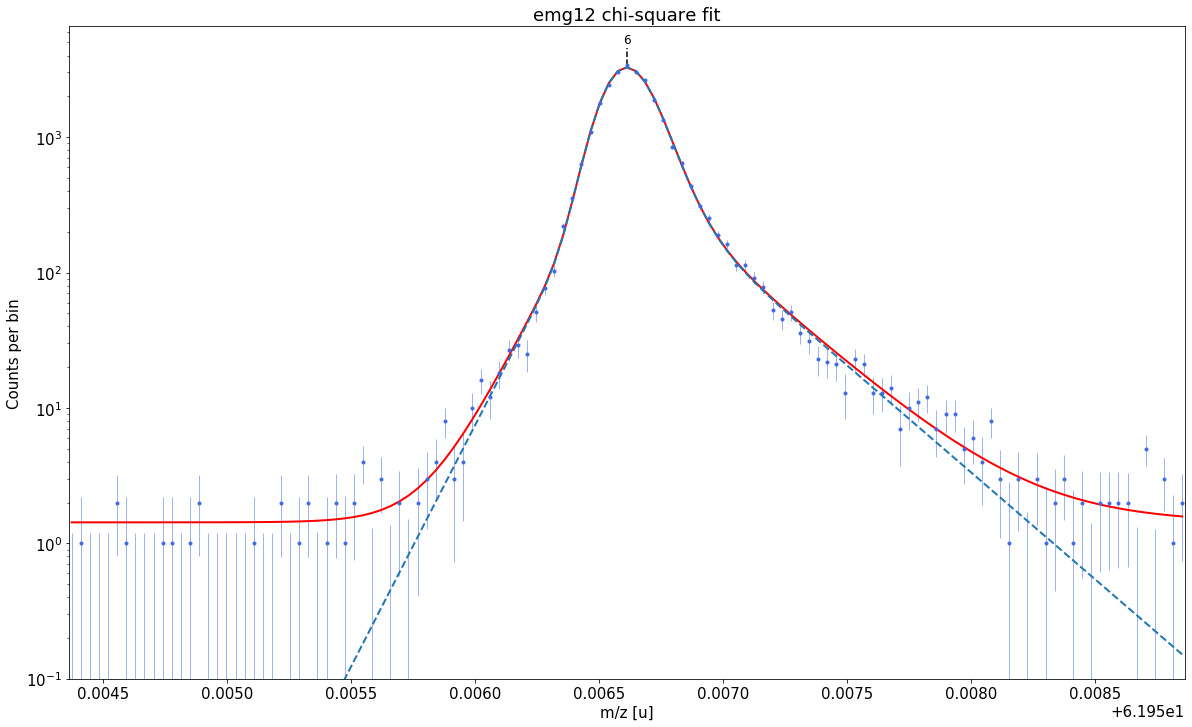

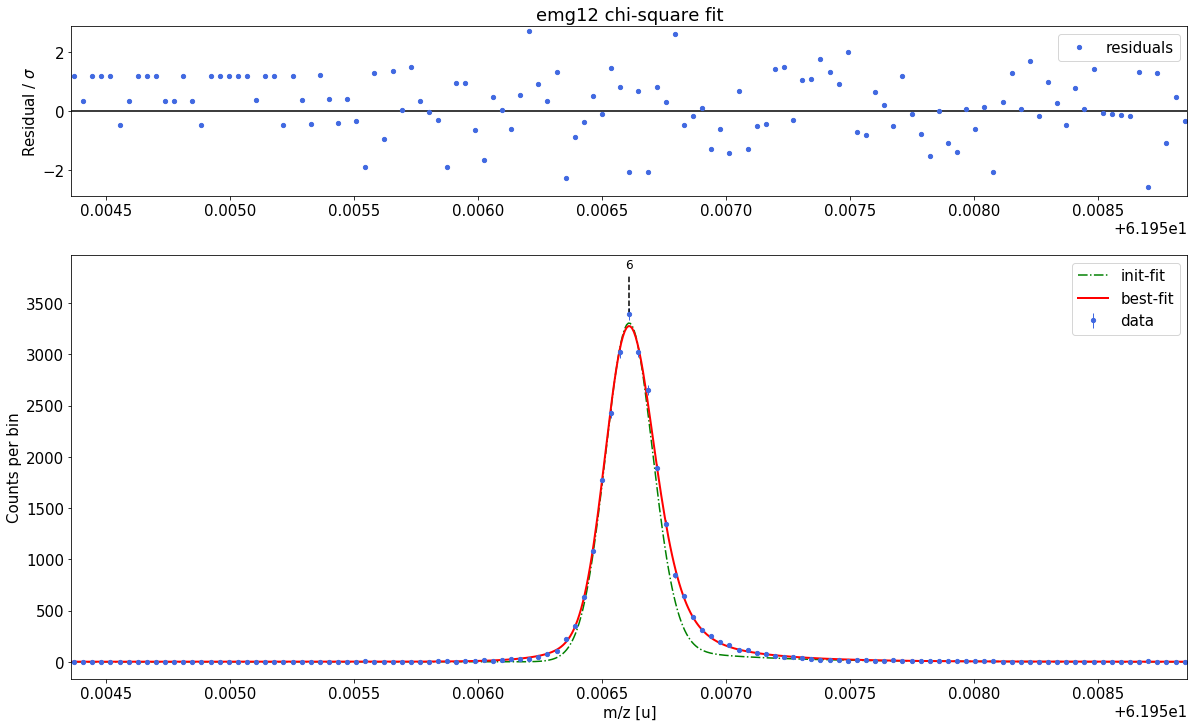


emg12-fit yields reduced chi-square of: 1.22 +- 0.13


##### Fitting data with emg21 #####-----------------------------------------------------------------------------------------



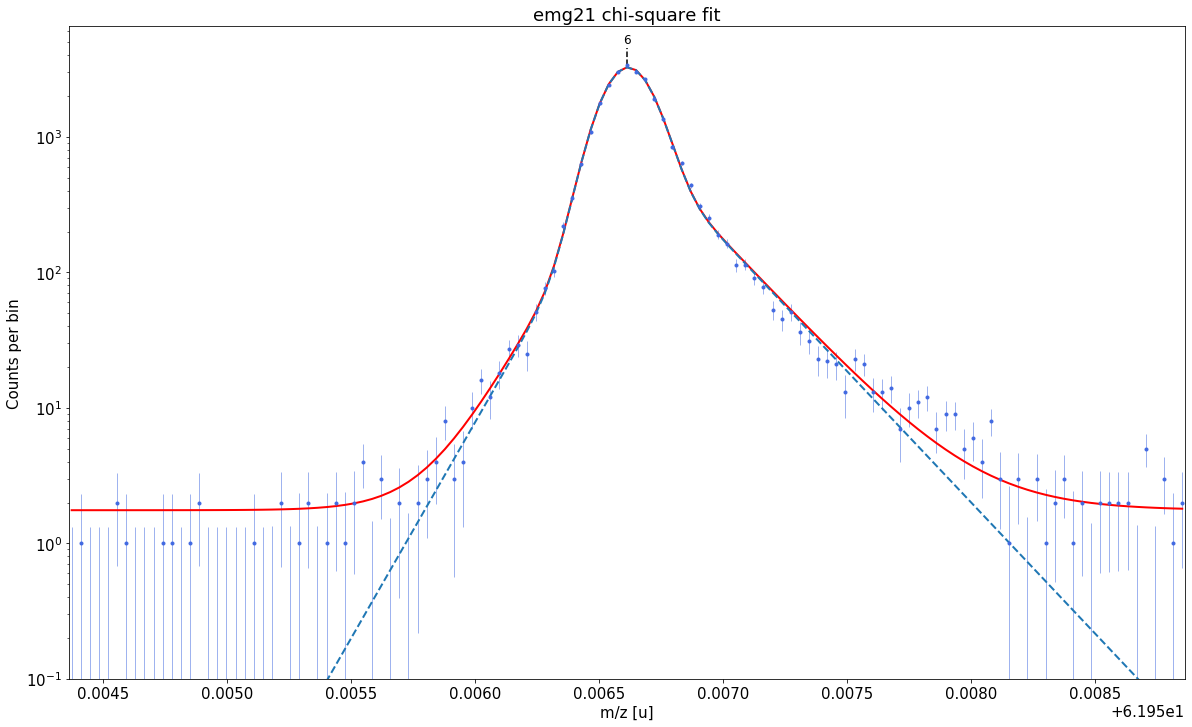

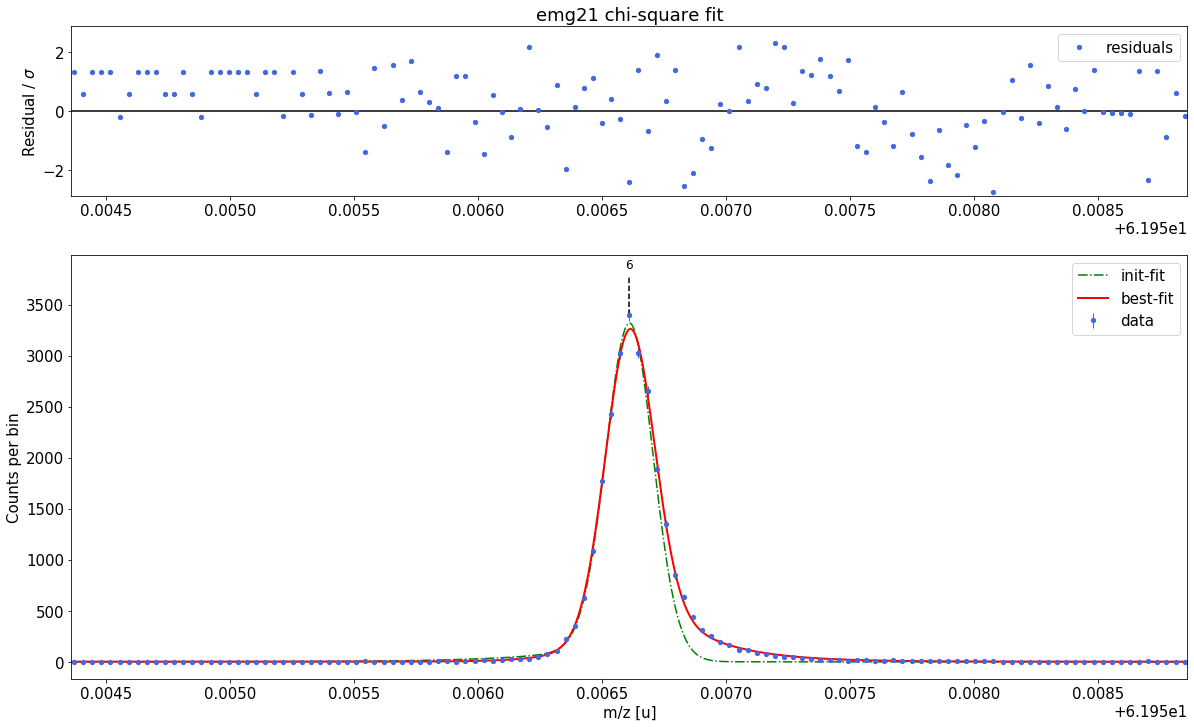


emg21-fit yields reduced chi-square of: 1.47 +- 0.13


##### Fitting data with emg22 #####-----------------------------------------------------------------------------------------



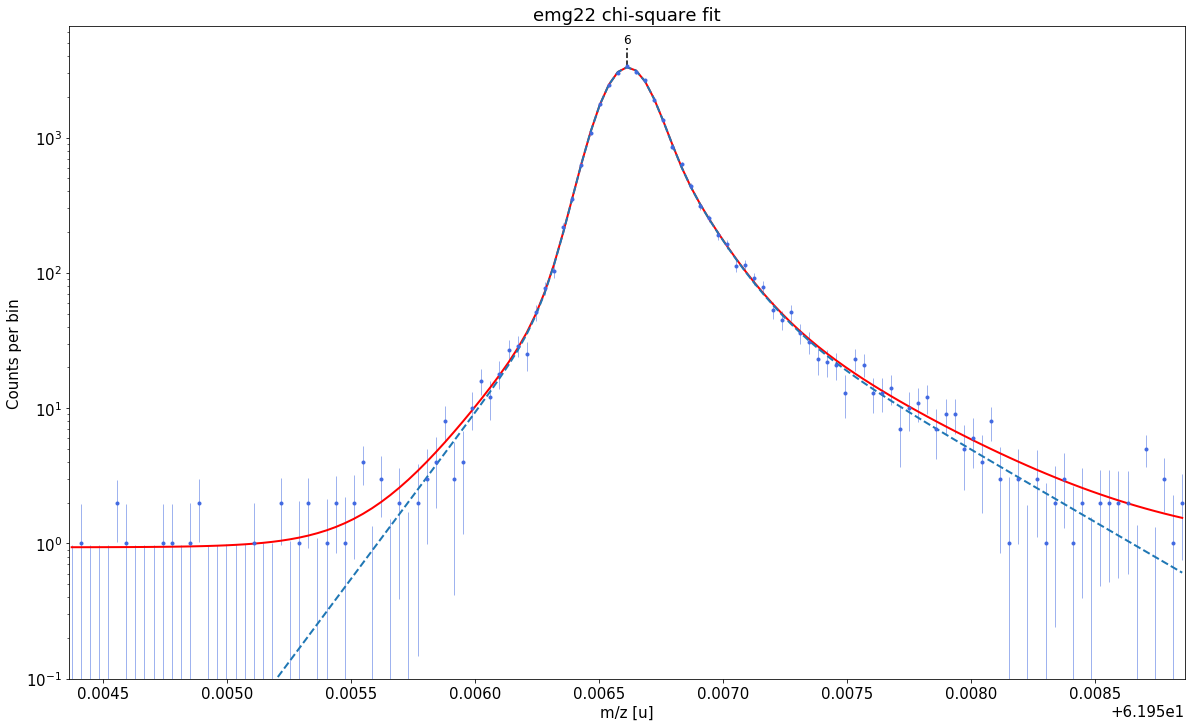

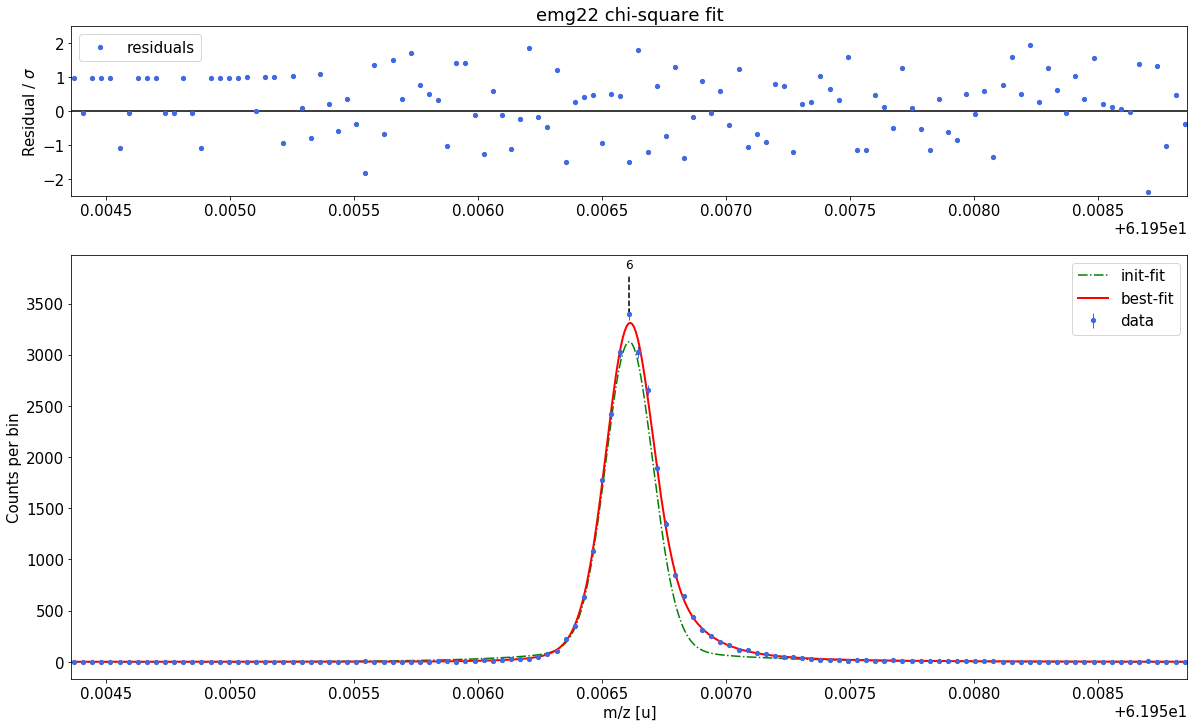


emg22-fit yields reduced chi-square of: 0.96 +- 0.13


##### Fitting data with emg23 #####-----------------------------------------------------------------------------------------



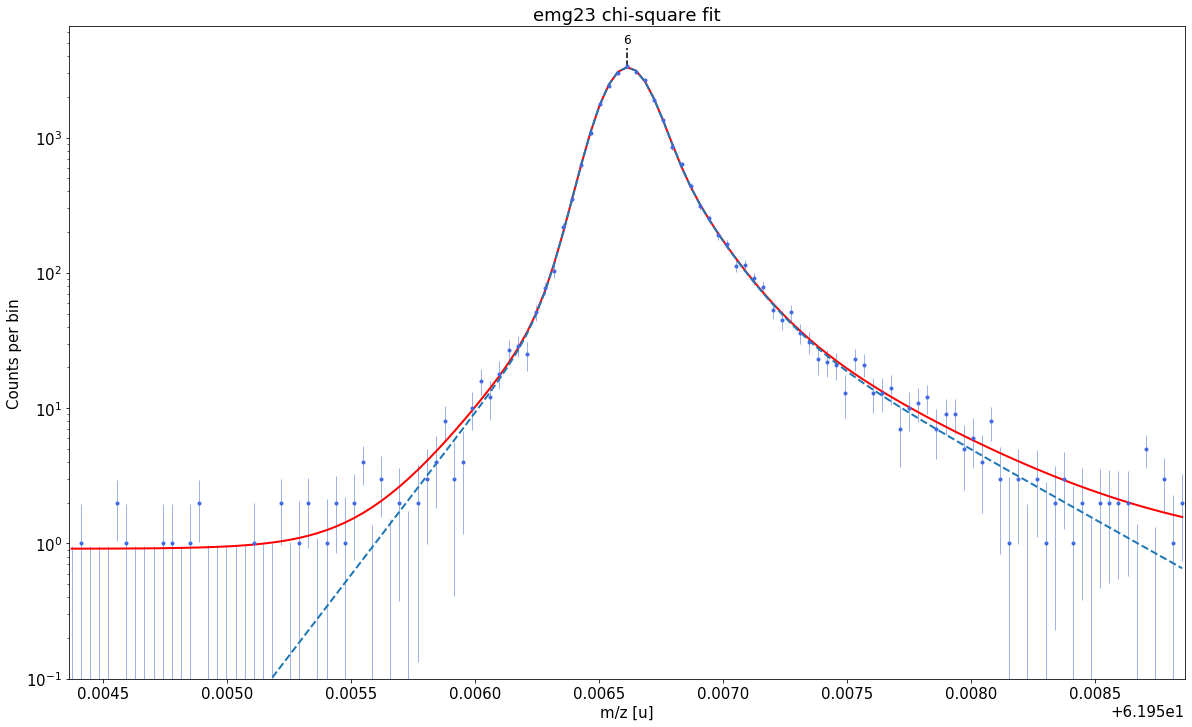

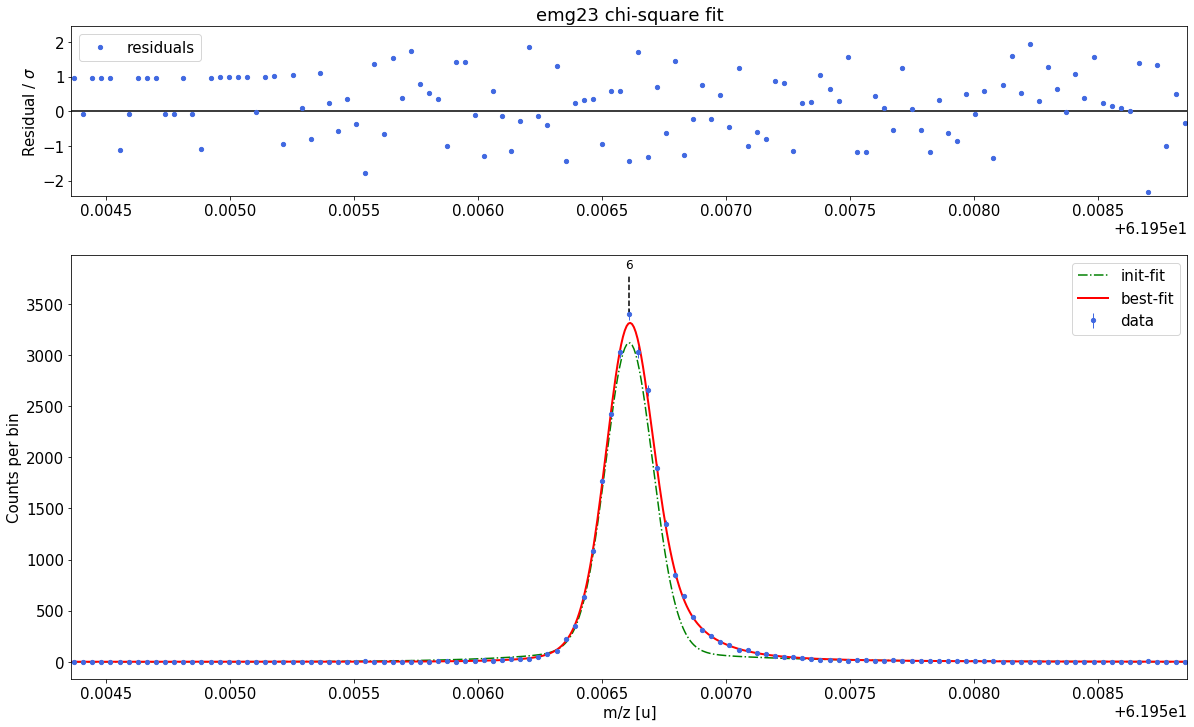

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg23-fit yields reduced chi-square of: 0.98 +- 0.13


##### Fitting data with emg32 #####-----------------------------------------------------------------------------------------



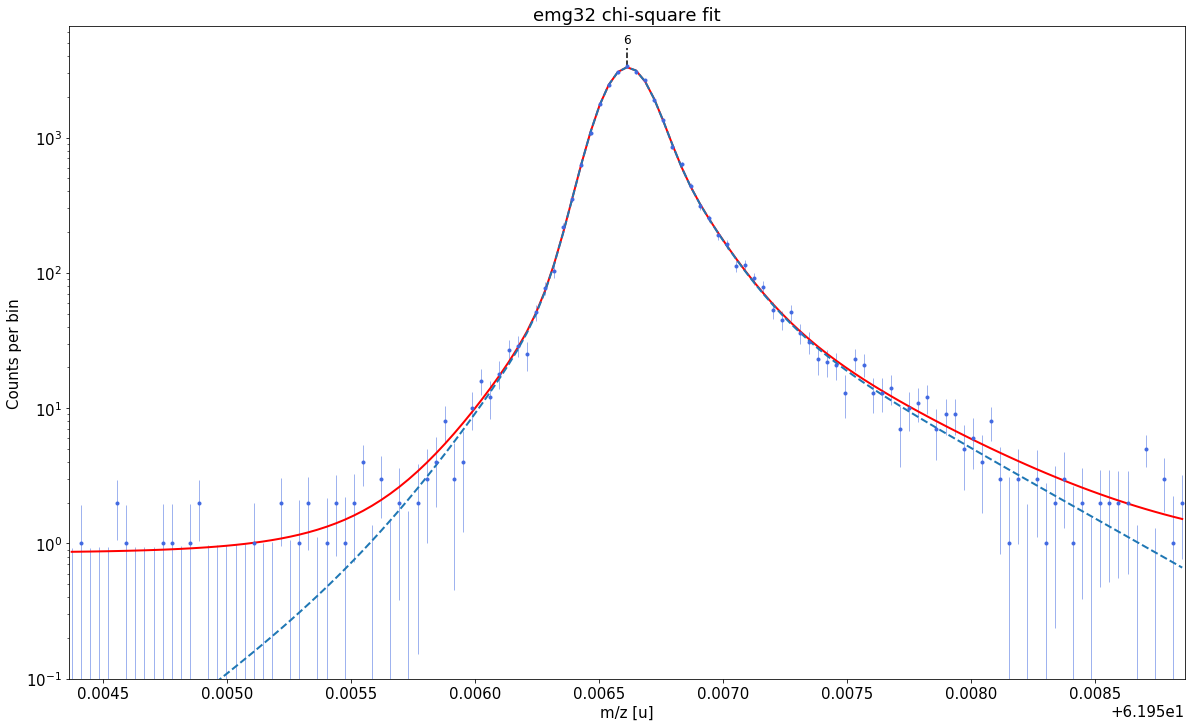

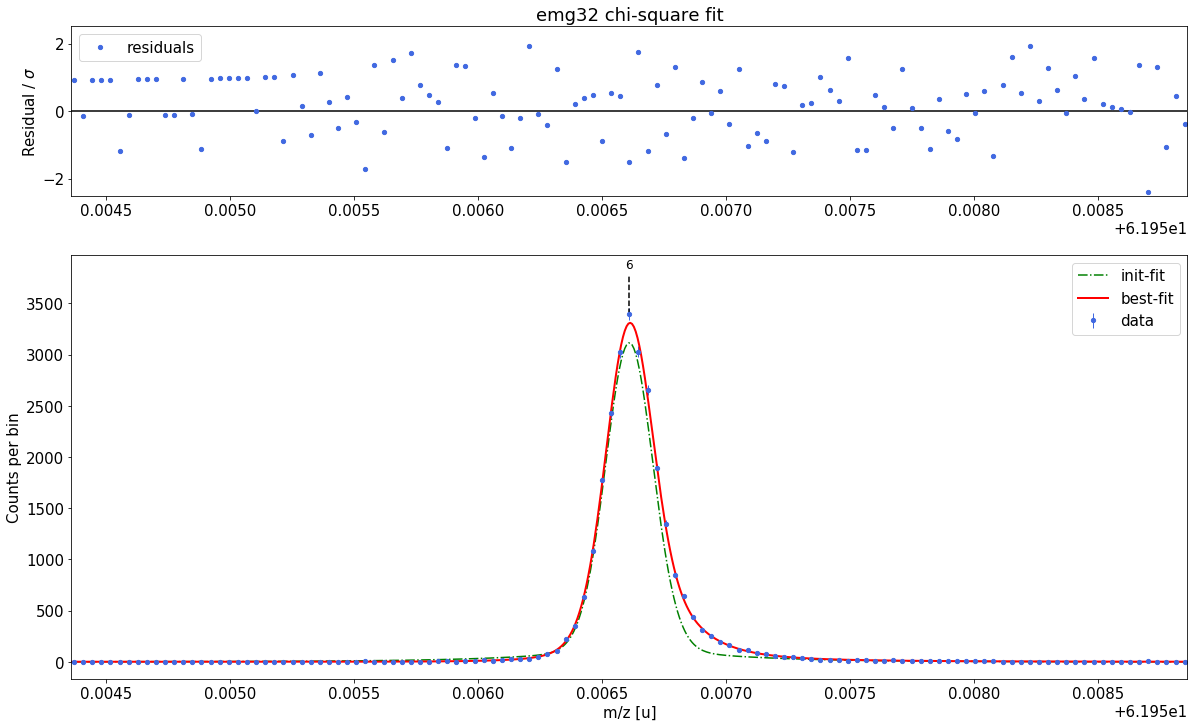

             This tail order is likely overfitting the data and will be excluded from selection.

emg32-fit yields reduced chi-square of: 0.98 +- 0.13


##### Fitting data with emg33 #####-----------------------------------------------------------------------------------------



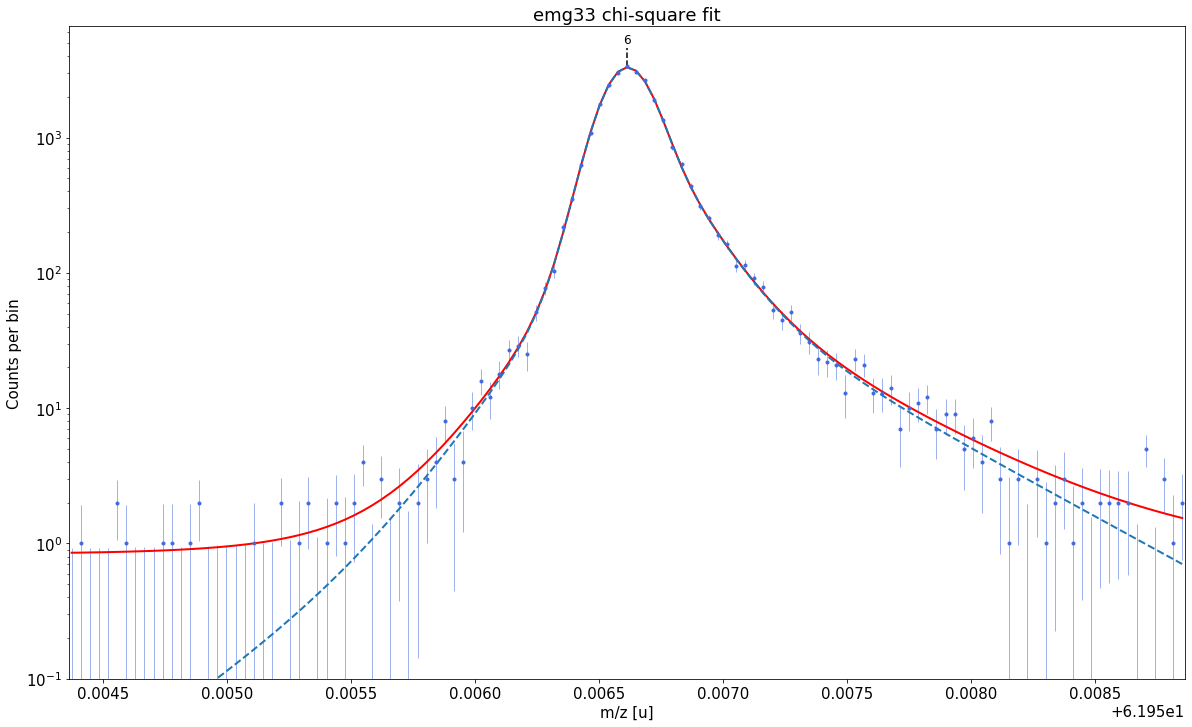

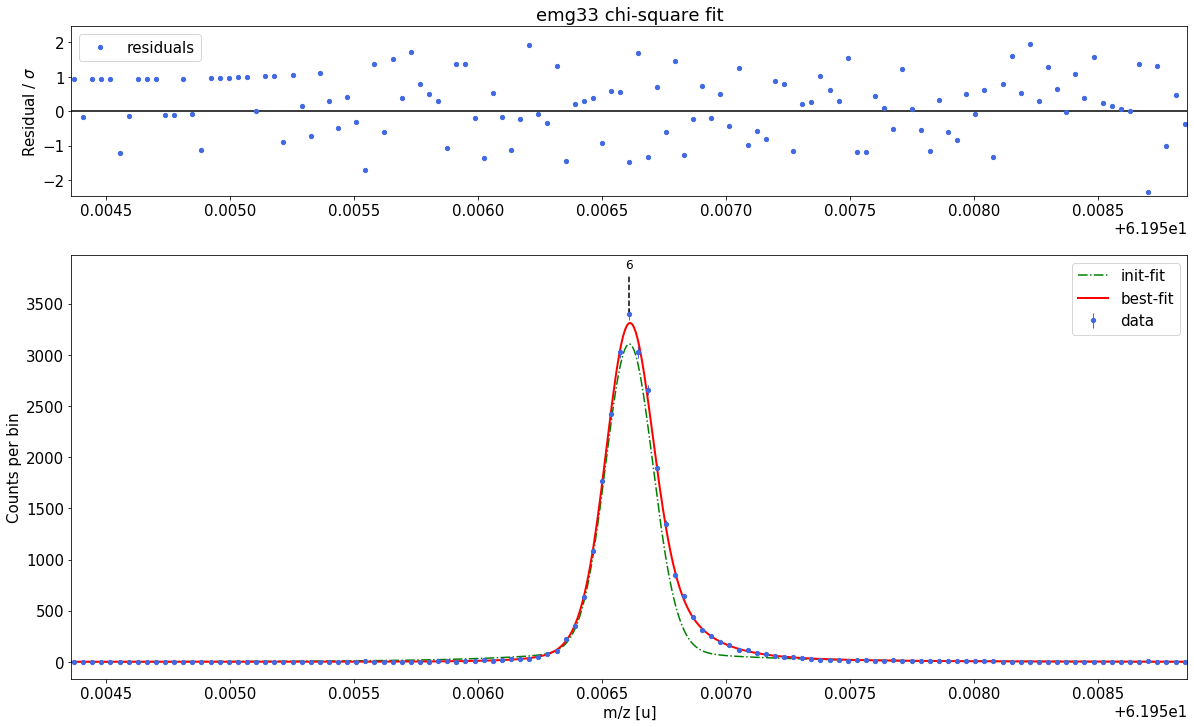

             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.
             This tail order is likely overfitting the data and will be excluded from selection.

emg33-fit yields reduced chi-square of: 0.99 +- 0.14


##### RESULT OF AUTOMATIC MODEL SELECTION: #####

    Best fit model determined to be: emg22
    Corresponding chi²-reduced: 0.96 


##### Peak-shape determination #####-------------------------------------------------------------------------------------------


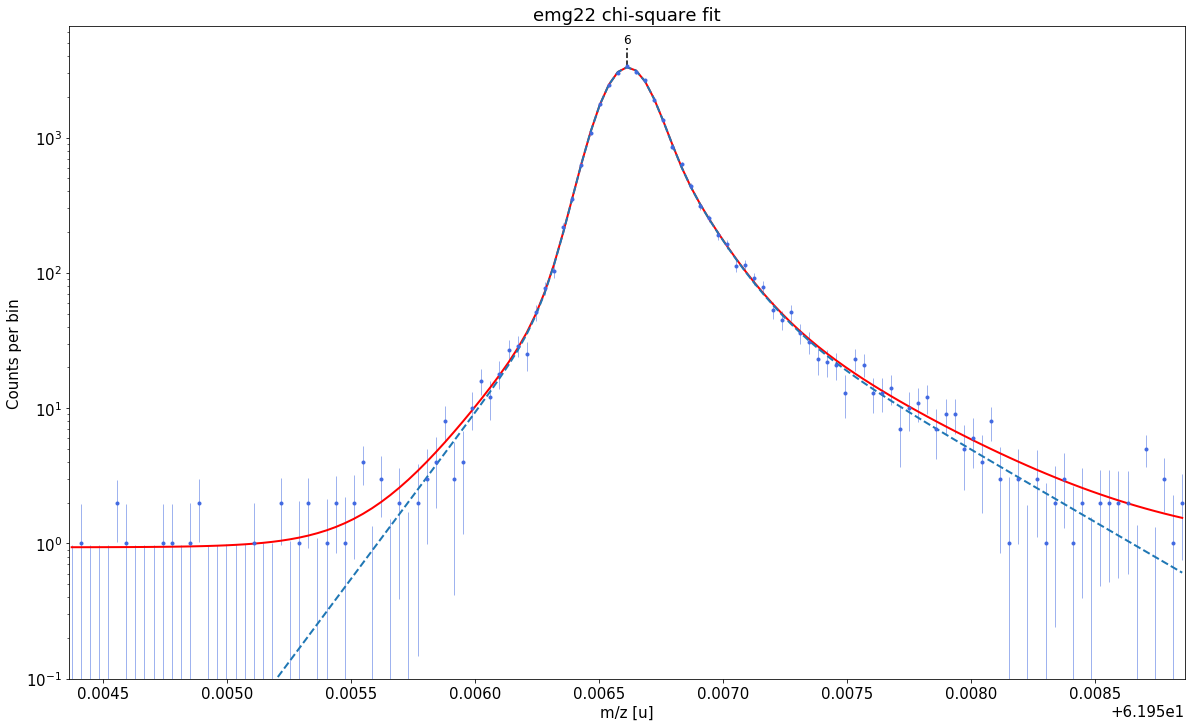

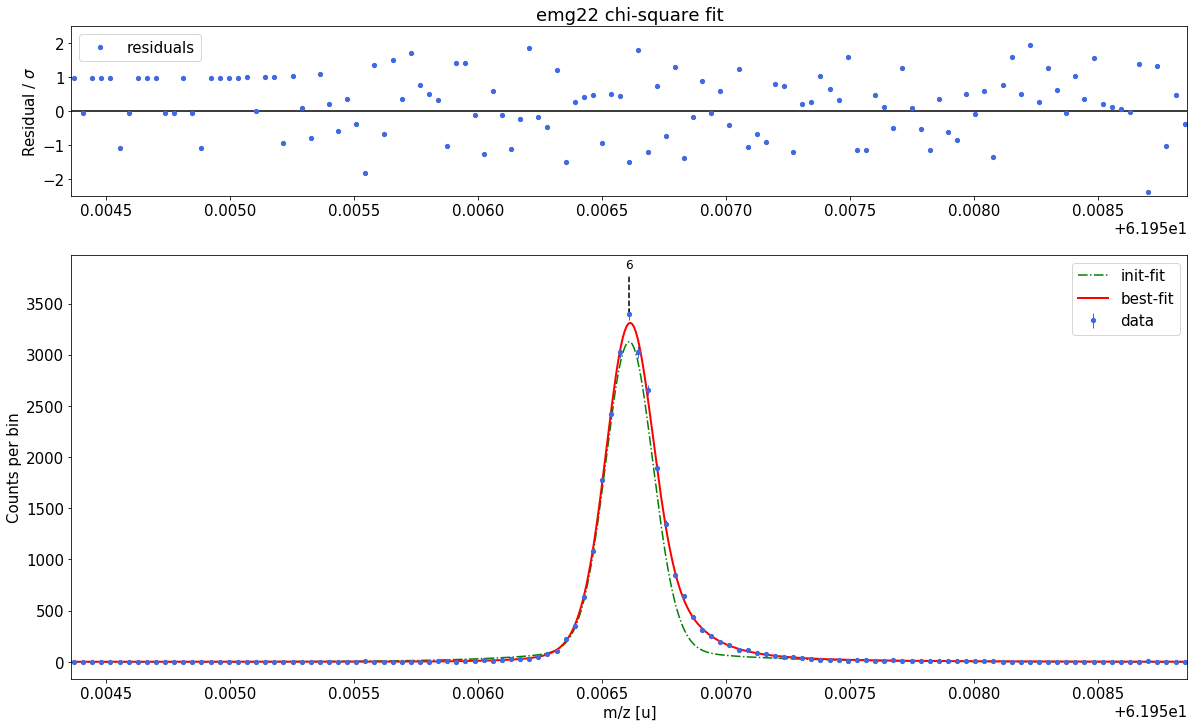

In [40]:
#spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e') # default settings and automatic model selection

spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e',x_fit_range=0.0045) # user-defined fit range 

#spec.determine_peak_shape(species_shape_calib='Ca43:F19:-1e',fit_model='emg12',vary_tail_order=False) # user-defined model

## Determine constant of proportionality A_stat_emg for subsequent stat. error estimations (OPTIONAL, feel free to skip this)

The statistical uncertainties of Hyper-EMG fits are estimated using the equation:

$\sigma_{stat} = A_{stat,emg} \cdot \frac{\mathrm{FWHM}}{\sqrt{N_{counts}}}$

where $\mathrm{FWHM}$ and $N_{counts}$ refer to the full width at half maximum and the number of counts in the respective peak.

This method will typically run for ~10 minutes if N_spetra=1000 (default) is used. If this step is skipped, the default value $A_{stat,emg} = 0.52$ will be used.

Creating synthetic spectra by bootstrapped re-sampling and fitting them for A_stat determination.
Depending on the choice of `N_spectra` this can take a few minutes. Interrupt kernel if this takes too long.

Done!

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 8
    # variables        = 1
    chi-square         = 1.5599e-08
    reduced chi-square = 2.2284e-09
    Akaike info crit   = -158.444191
    Bayesian info crit = -158.364750
[[Variables]]
    amplitude:  1.5233e-04 +/- 1.6364e-05 (10.74%) (init = 1)
    exponent:  -0.5 (fixed)


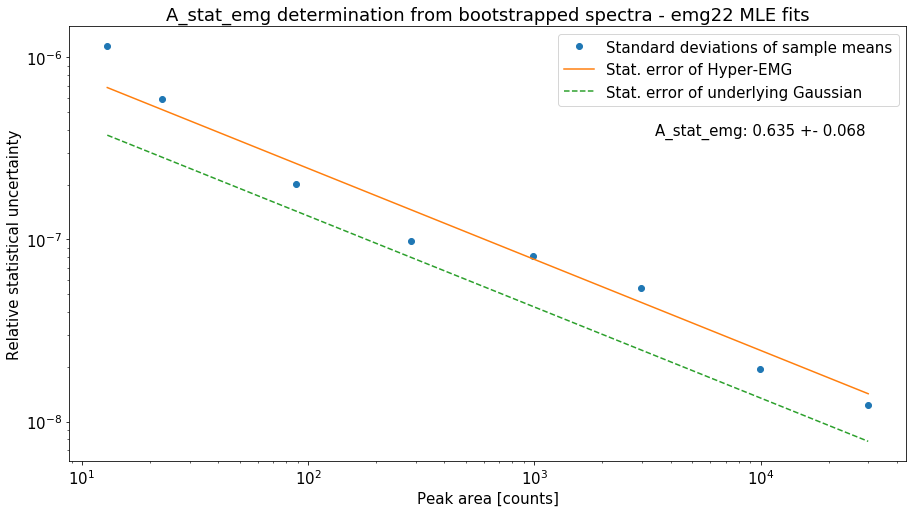

A_stat of a Gaussian model: 0.425
Default A_stat_emg for Hyper-EMG models: 0.52
A_stat_emg for this spectrum's emg22 fit model: 0.635 +- 0.068


In [41]:
# Determine A_stat_emg and save the resulting plot 
spec.determine_A_stat_emg(species='Ca43:F19:-1e',x_range=0.004,plot_filename='output/'+filename+'MLE',N_spectra=10) 

## Fit all peaks in spectrum, perform mass (re-)calibration, determine peak-shape uncertainties and update peak properties table with the results
The simultaneous mass recalibration is invoked by specifying the `species_mass_calib` (or alternatively the `index_mass_calib`) argument 

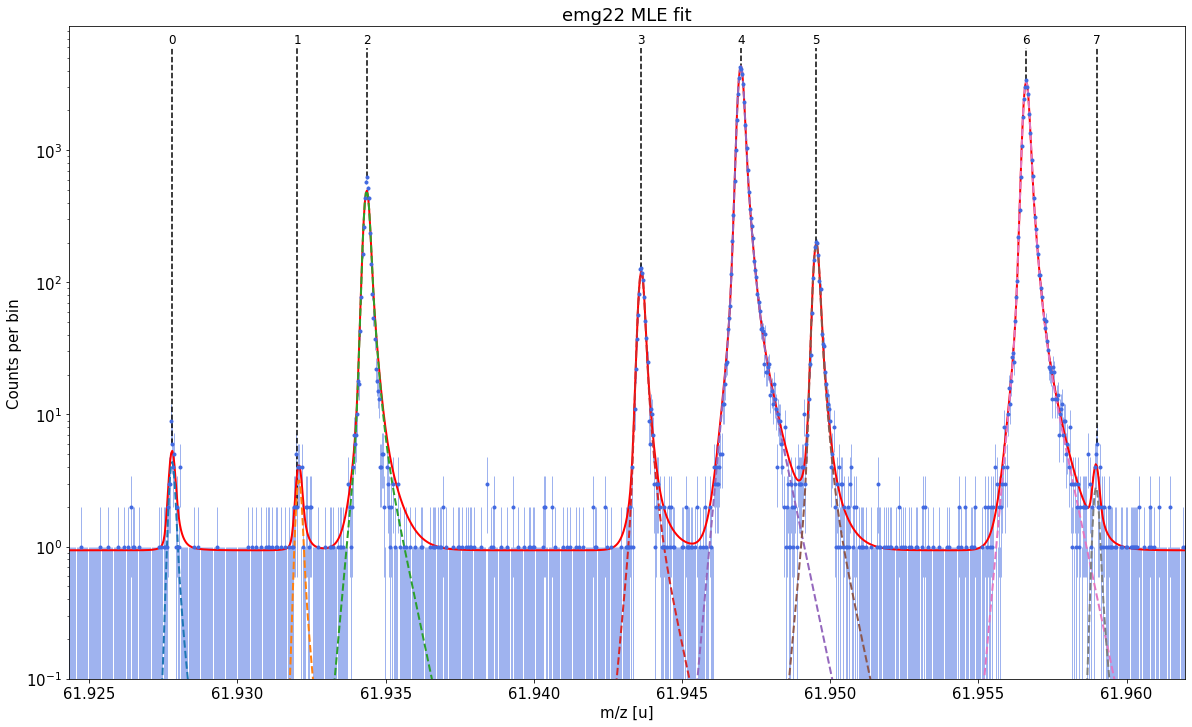

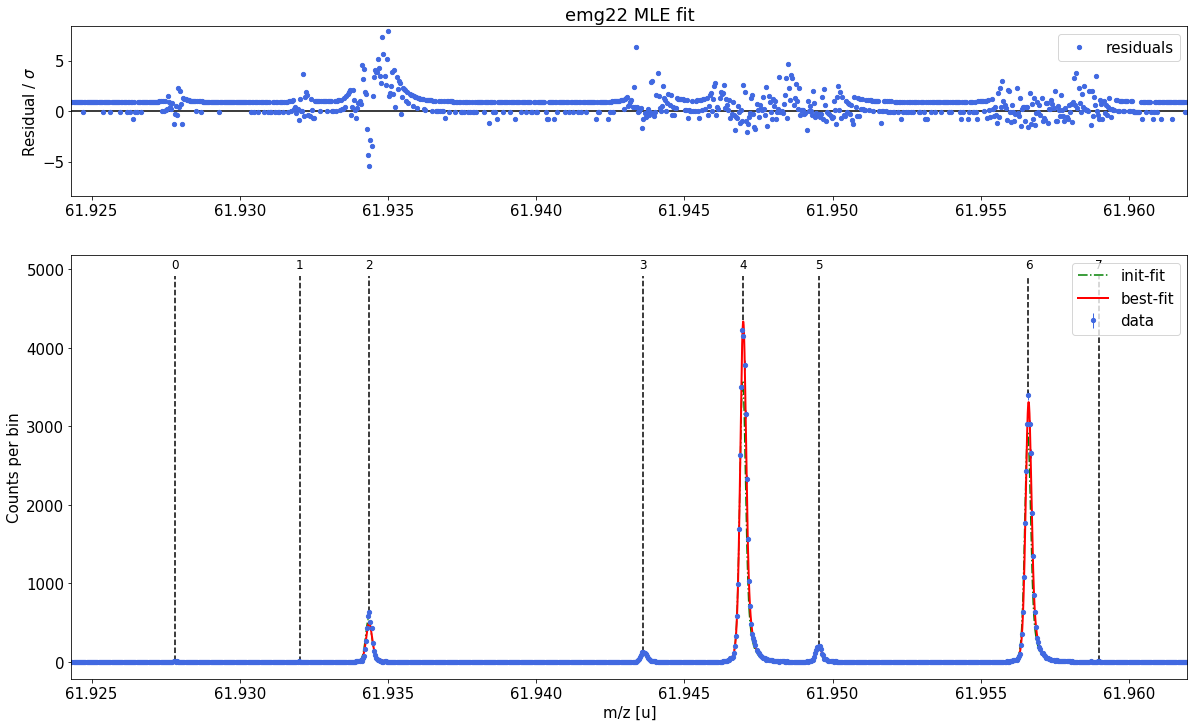


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.3e-08

Recalibration factor:      0.999999711 = 1 -2.89e-07
Relative recalibration error:  1.4e-08 


##### Peak-shape uncertainty evaluation #####

Determining absolute centroid shifts of mass calibrant.

Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 0 and mass calibrant by 0.497351 / -0.268 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 1 and mass calibrant by 1.419093 / -0.367 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 2 and mass calibrant by -0.124142 / 0.337 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 3 and mass calibrant by 0.009671 / 0.025 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 5 and mass calibrant by -0.013996 / 0.002 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 6 and mass calibrant by 0.011674 / -0.

,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,MLE,0.57,34.28,5.57,61.927803,4.201252e-07,1.364463e-08,3.363408e-08,4.216902e-07,62.0,-66740.227,24.325359,6.103
1,61.932021,Cu62:-1e,-,61.932046,6.940000e-07,False,emg22,MLE,0.57,25.16,5.57,61.932083,4.903586e-07,1.364463e-08,3.896354e-08,4.920934e-07,62.0,-62753.555,28.388556,33.878
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,MLE,0.57,3879.62,47.60,61.934370,3.948739e-08,1.364463e-08,1.705503e-08,4.512542e-08,NaN,NaN,2.603353,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,MLE,0.57,939.07,23.68,61.943636,8.024891e-08,1.364463e-08,1.113415e-08,8.215858e-08,62.0,-51992.089,4.740561,-5.177
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,MLE,0.57,33951.28,140.21,61.946993,1.334555e-08,1.364463e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,MLE,0.57,1542.61,30.25,61.949540,6.260639e-08,1.364463e-08,1.106218e-08,6.502390e-08,62.0,-46492.523,3.752245,5.702
6,61.956611,Ca43:F19:-1e,shape calibrant,61.956621,2.440018e-07,False,emg22,MLE,0.57,25913.21,121.87,61.956622,1.527343e-08,1.364463e-08,2.667518e-09,2.065355e-08,62.0,-39895.649,1.191962,0.623
7,61.958997,?,-,NaN,NaN,False,emg22,MLE,0.57,22.08,5.39,61.958978,5.232160e-07,1.364463e-08,1.512689e-07,5.448150e-07,NaN,NaN,31.443685,NaN


In [42]:
spec.fit_peaks(species_mass_calib='Ti46:O16:-1e') # Maximum likelihood fit of all peaks in the spectrum
 
#spec.fit_peaks(species_mass_calib='Ti46:O16:-1e',x_fit_cen=61.9455,x_fit_range=0.01) # fit restricted to a user-defined mass range

## Plot the fit curve zoomed to a region of interest (OPTIONAL)

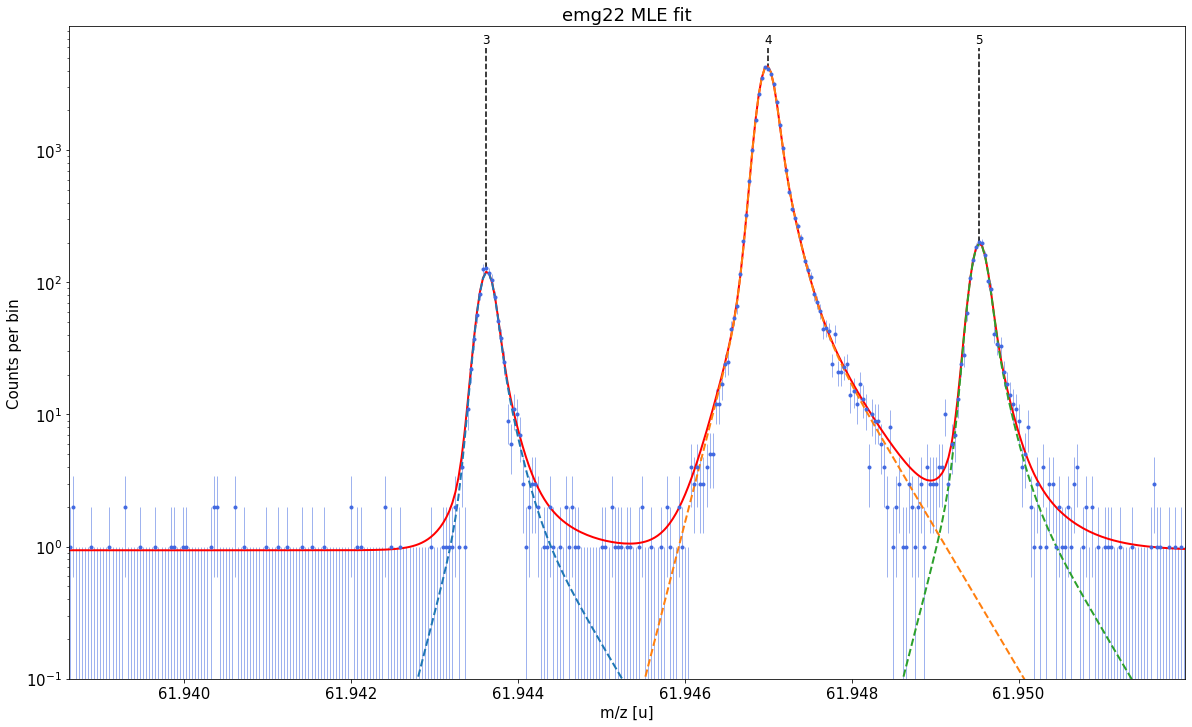

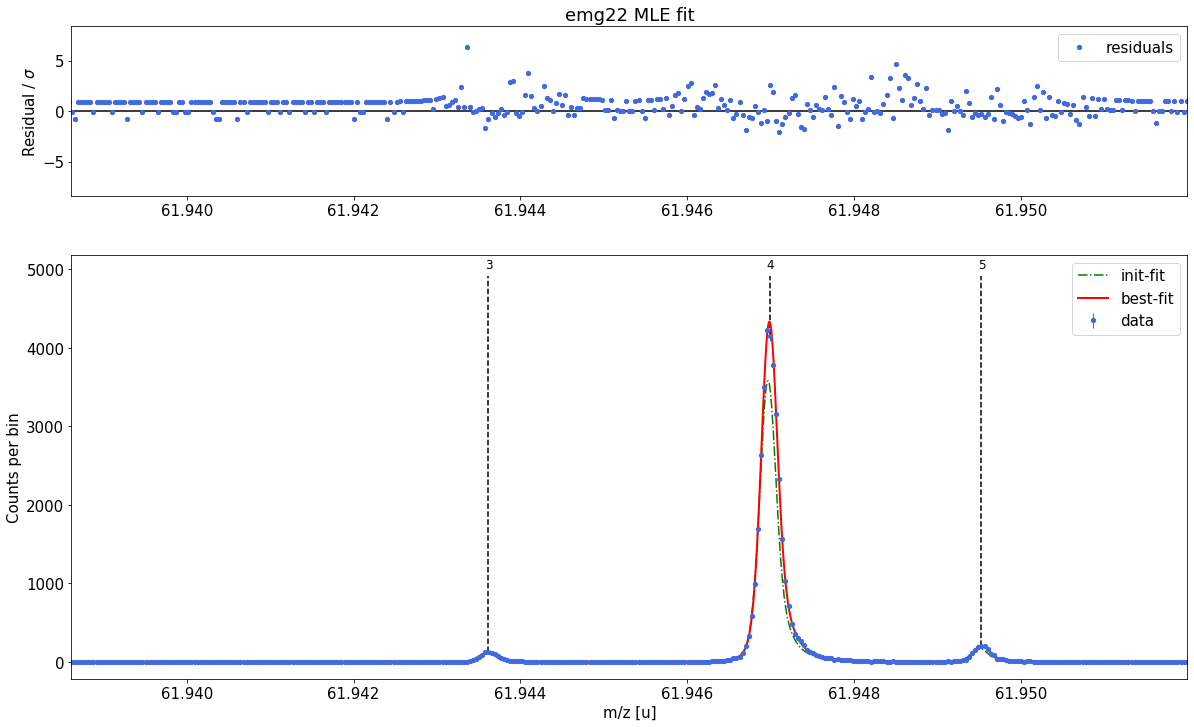

In [9]:
spec.plot_fit_zoom(peak_indeces=[3,4]) # zoom to region around peaks 3 and 4 

## Save results of MLE fit

In [10]:
spec.save_results('output/'+filename+' fitting MLE')

Fit results saved to file: 2019-09-13_004-_006 SUMMED High stats 62Ga fitting MLE.xlsx

Peak-shape calibration saved to file: 2019-09-13_004-_006 SUMMED High stats 62Ga fitting MLE_peakshape_calib.txt


# The above represents a full fit of the spectrum. Find below alternatives to some of the above procedures:

## Alternative 1: Performing the mass recalibration spearately before the ion-of-interest fits
All steps up to the final peak fit are identical (for breviety here we simply create an exact clone of the above spectrum object).

In [11]:
import copy
spec2 = copy.deepcopy(spec) # create a clone of the spectrum object

### First obtain the recalibration factor by a fit of the mass calibrant

##### Calibrant fit #####


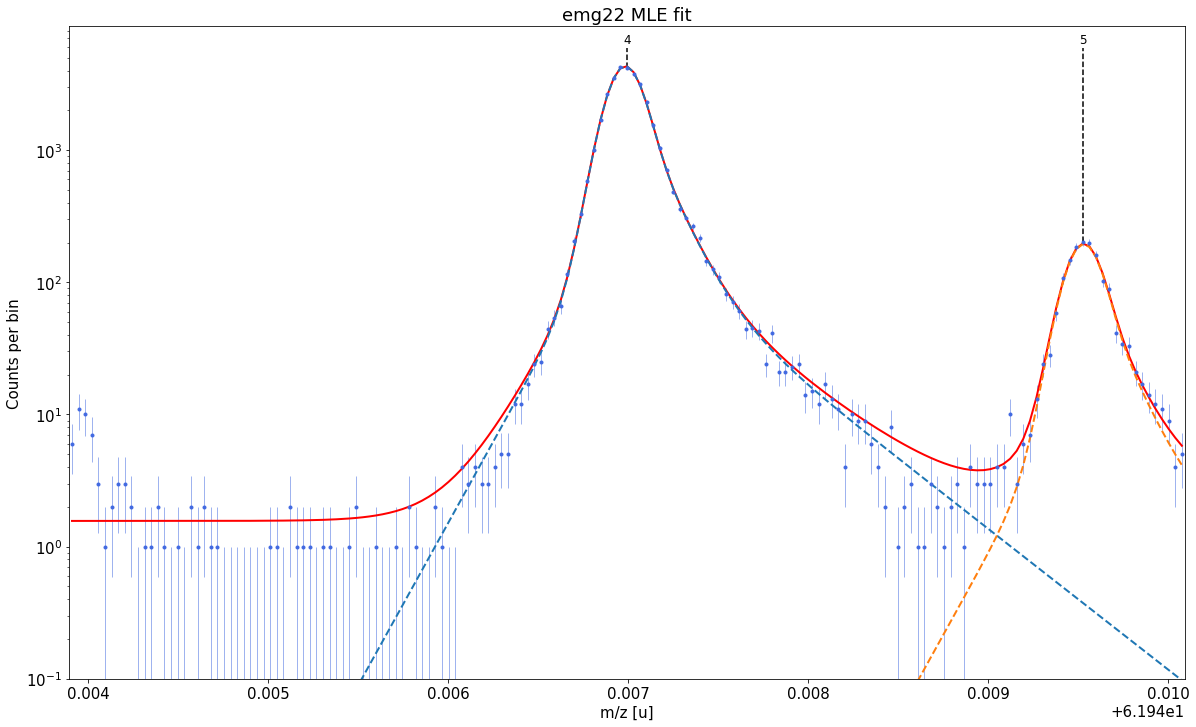

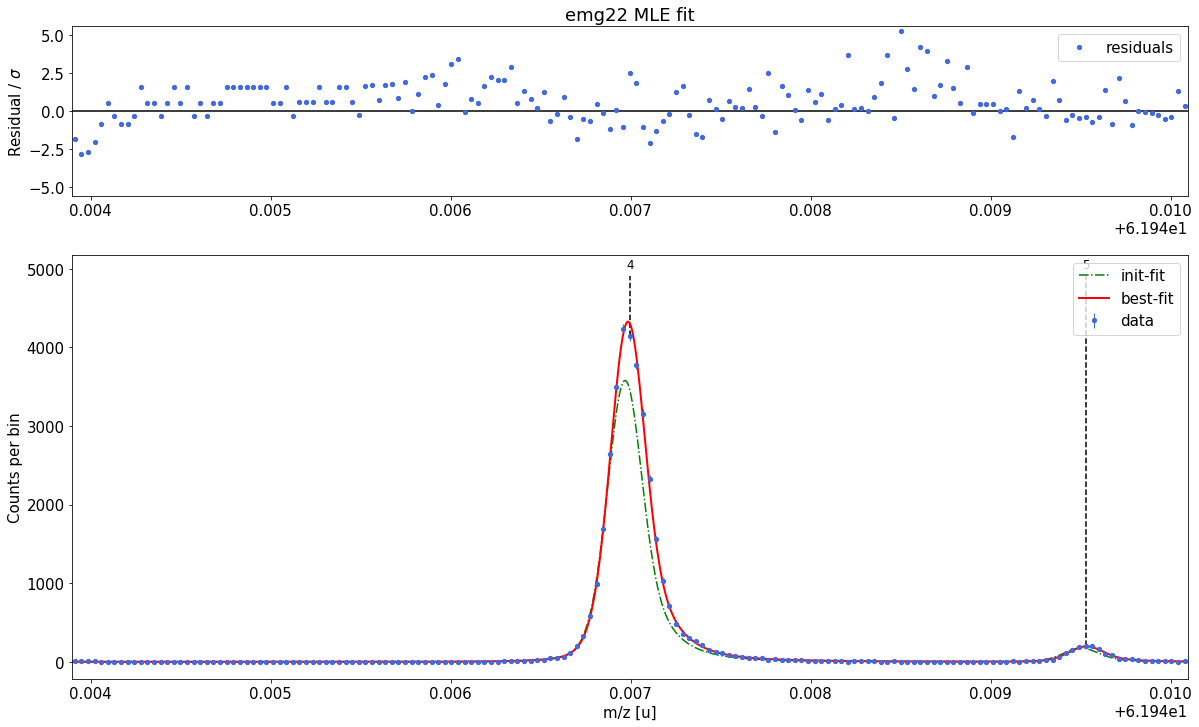


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.1e-08

Recalibration factor:      0.999999711 = 1 -2.89e-07
Relative recalibration error:  1.1e-08 

Determining absolute centroid shifts of mass calibrant.



In [12]:
spec2.fit_calibrant(species_mass_calib='Ti46:O16:-1e')

## Fit all peaks and use the mass recalibration factor from above to calculate the final mass values

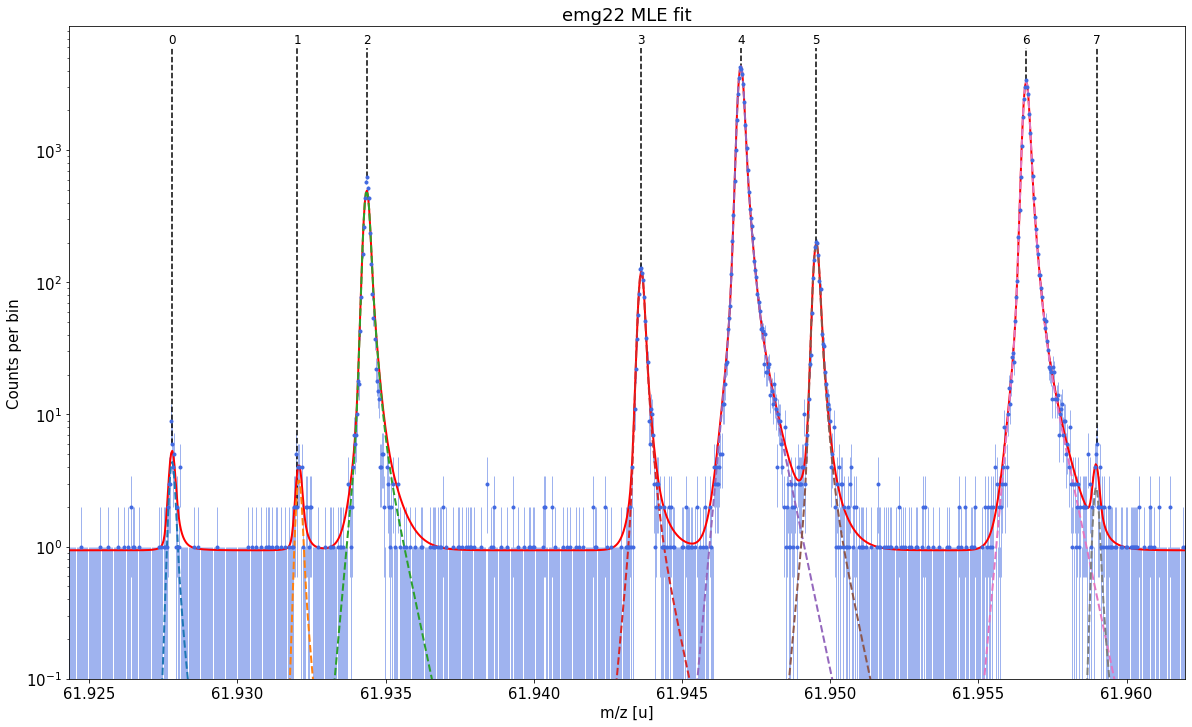

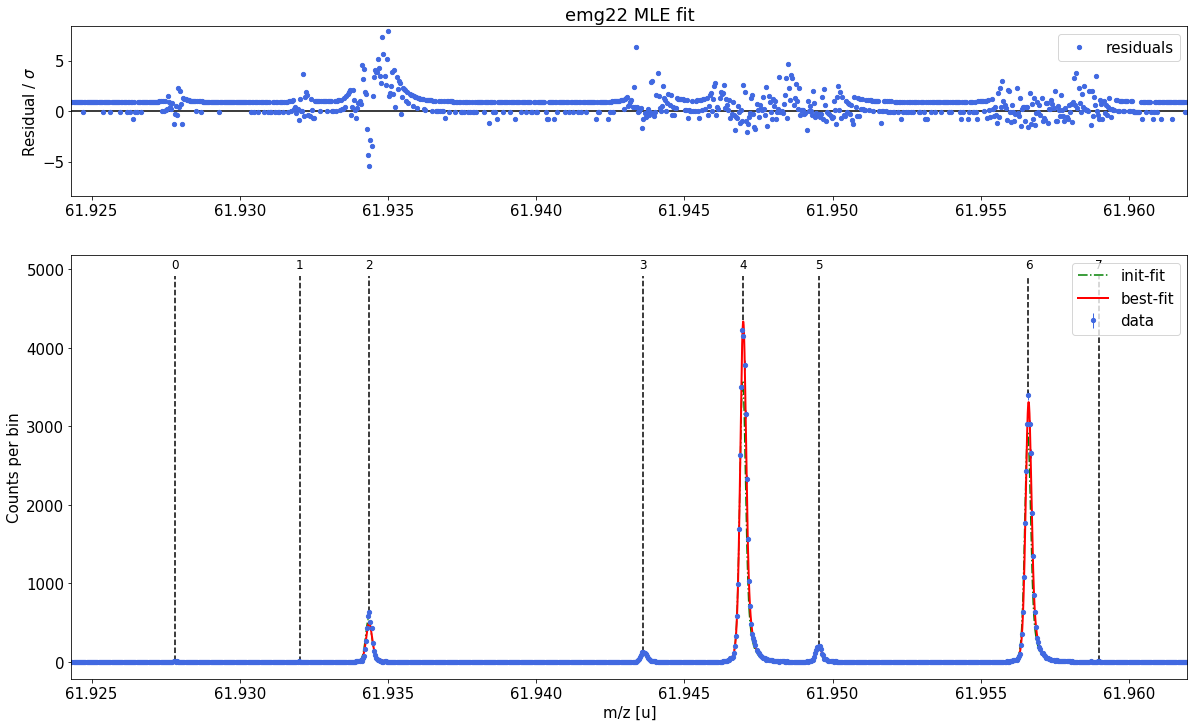


##### Peak-shape uncertainty evaluation #####

Determining absolute centroid shifts of mass calibrant.

Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 0 and mass calibrant by 0.497351 / -0.268 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 1 and mass calibrant by 1.419093 / -0.367 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 2 and mass calibrant by -0.124142 / 0.337 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 3 and mass calibrant by 0.009671 / 0.025 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 5 and mass calibrant by -0.013996 / 0.002 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 6 and mass calibrant by 0.011674 / -0.032 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 7 and mass calibrant by -1.469082 / 0.908 μu. 

Re-fitting with  theta  =  0.724714 +/- 0.023491  shifts Δm of peak 0 and mass calibrant by -1.447898 / 1.312 μu. 
Re-

,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,MLE,0.57,34.28,5.57,61.927803,3.442326e-07,1.130432e-08,3.363408e-08,3.460565e-07,62.0,-66740.242,19.962401,6.088
1,61.932021,Cu62:-1e,-,61.932046,6.940000e-07,False,emg22,MLE,0.57,25.16,5.57,61.932083,4.017788e-07,1.130432e-08,3.896354e-08,4.038219e-07,62.0,-62753.570,23.296232,33.863
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,MLE,0.57,3879.62,47.60,61.934370,3.235428e-08,1.130432e-08,1.705503e-08,3.828134e-08,NaN,NaN,2.208508,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,MLE,0.57,939.07,23.68,61.943636,6.575251e-08,1.130432e-08,1.113415e-08,6.763985e-08,62.0,-51992.104,3.902828,-5.192
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,MLE,1.30,33909.80,213.09,61.946993,1.094145e-08,1.130432e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,MLE,0.57,1542.61,30.25,61.949540,5.129699e-08,1.130432e-08,1.106218e-08,5.367998e-08,62.0,-46492.538,3.097637,5.687
6,61.956611,Ca43:F19:-1e,"shape calibrant, Ti45:O17:-1e admixture?",61.956621,2.440018e-07,False,emg22,MLE,0.57,25913.21,121.87,61.956622,1.251439e-08,1.130432e-08,2.667518e-09,1.707376e-08,62.0,-39895.663,0.985365,0.608
7,61.958997,?,-,NaN,NaN,False,emg22,MLE,0.57,22.08,5.39,61.958978,4.287007e-07,1.130432e-08,1.512689e-07,4.547465e-07,NaN,NaN,26.245432,NaN


In [17]:
spec2.fit_peaks()

## Alternative2: Chi-square instead of MLE fitting 

Creating synthetic spectra by bootstrapped re-sampling and fitting them for A_stat determination.
Depending on the choice of `N_spectra` this can take a few minutes. Interrupt kernel if this takes too long.

Done!

[[Model]]
    Model(powerlaw)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 5
    # data points      = 8
    # variables        = 1
    chi-square         = 2.0490e-09
    reduced chi-square = 2.9271e-10
    Akaike info crit   = -174.683003
    Bayesian info crit = -174.603562
[[Variables]]
    amplitude:  1.3516e-04 +/- 6.3264e-06 (4.68%) (init = 1)
    exponent:  -0.5 (fixed)


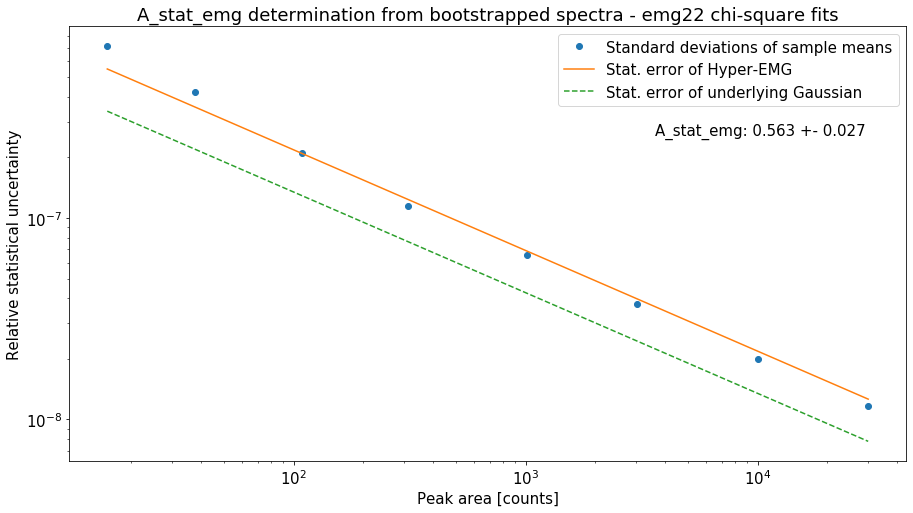

A_stat of a Gaussian model: 0.425
Default A_stat_emg for Hyper-EMG models: 0.52
A_stat_emg for this spectrum's emg22 fit model: 0.563 +- 0.027


In [22]:
import copy
spec_chi_sq = copy.deepcopy(spec)
spec_chi_sq.determine_A_stat_emg(species='Ca43:F19:-1e',x_range=0.004,cost_func='chi-square') # use Pearson's chi-squared statistic

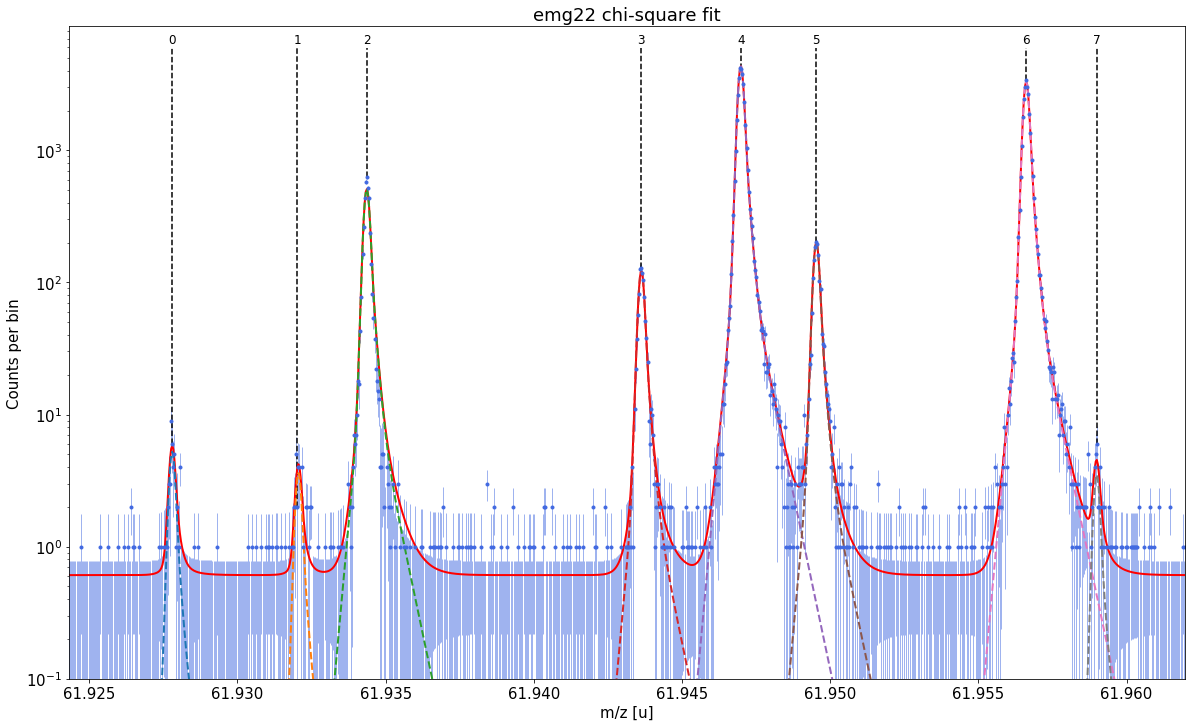

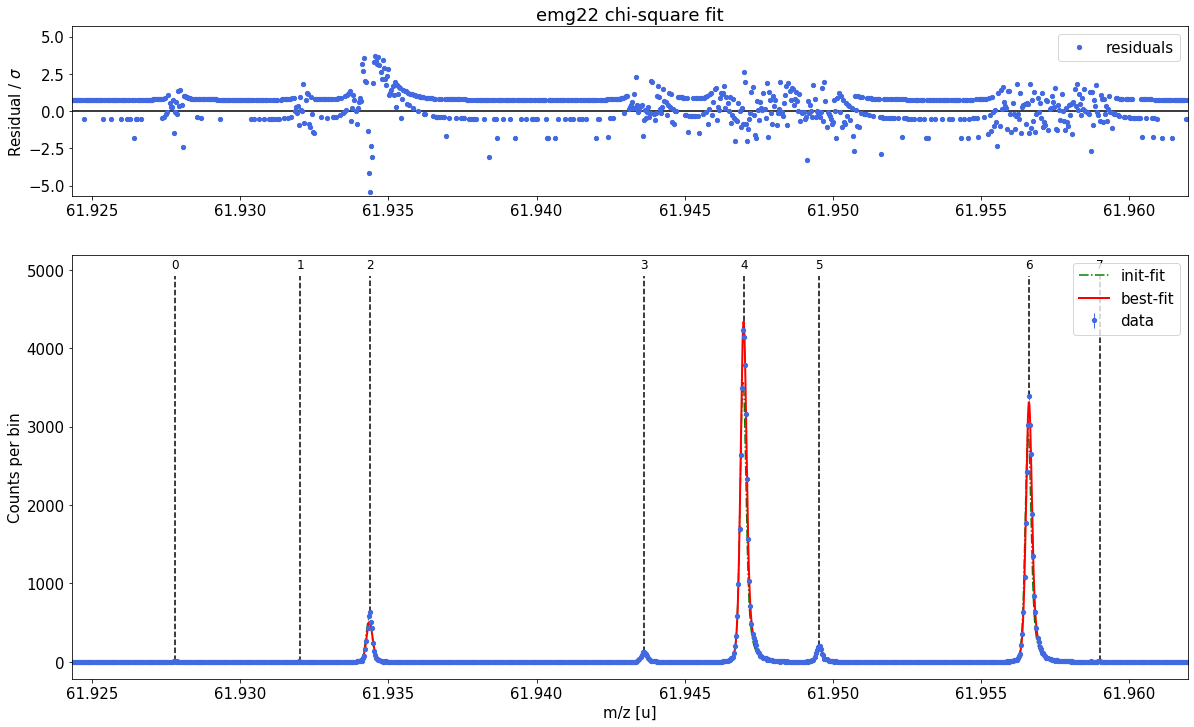


##### Mass recalibration #####


Relative literature error of mass calibrant:    3e-09
Relative statistical error of mass calibrant:   1.2e-08

Recalibration factor:      0.999999710 = 1 -2.90e-07
Relative recalibration error:  1.2e-08 


##### Peak-shape uncertainty evaluation #####

Determining absolute centroid shifts of mass calibrant.

Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 0 and mass calibrant by 0.51581 / -0.479 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 1 and mass calibrant by 0.679335 / -0.555 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 2 and mass calibrant by -0.32189 / 0.327 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 3 and mass calibrant by -0.108786 / 0.103 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 5 and mass calibrant by -0.044844 / 0.047 μu. 
Re-fitting with  sigma  =  8.3e-05 +/- 3e-06  shifts Δm of peak 6 and mass calibrant by 0.010156 / -0.0

,x_pos,species,comment,m_AME,m_AME_error,extrapolated,fit_model,cost_func,red_chi,area,area_error,m_fit,rel_stat_error,rel_recal_error,rel_peakshape_error,rel_mass_error,A,atomic_ME_keV,mass_error_keV,m_dev_keV
0,61.927800,Ni62:-1e,-,61.927796,4.700000e-07,False,emg22,chi-square,0.99,40.92,7.49,61.927807,3.411822e-07,1.216648e-08,2.234155e-08,3.421293e-07,62.0,-66736.708,19.735861,9.622
1,61.932021,Cu62:-1e,-,61.932046,6.940000e-07,False,emg22,chi-square,0.99,28.22,6.66,61.932067,4.108145e-07,1.216648e-08,3.274970e-08,4.122974e-07,62.0,-62768.599,23.785171,18.835
2,61.934369,?,Non-isobaric,NaN,NaN,False,emg22,chi-square,0.99,3990.65,63.92,61.934370,3.454509e-08,1.216648e-08,2.132427e-08,4.238055e-08,NaN,NaN,2.444997,NaN
3,61.943618,Ga62:-1e,-,61.943641,6.940000e-07,False,emg22,chi-square,0.99,957.83,31.47,61.943635,7.050160e-08,1.216648e-08,1.242163e-08,7.261402e-08,62.0,-51992.207,4.189838,-5.295
4,61.946994,Ti46:O16:-1e,mass calibrant,61.946993,1.760001e-07,False,emg22,chi-square,0.99,34014.37,184.70,61.946993,1.183010e-08,1.216648e-08,NaN,NaN,62.0,-48864.806,NaN,0.000
5,61.949527,Sc46:O16:-1e,-,61.949534,7.320000e-07,False,emg22,chi-square,0.99,1573.74,40.42,61.949540,5.499653e-08,1.216648e-08,1.174502e-08,5.753770e-08,62.0,-46492.418,3.320249,5.807
6,61.956611,Ca43:F19:-1e,"shape calibrant, Ti45:O17:-1e admixture?",61.956621,2.440018e-07,False,emg22,chi-square,0.99,25965.46,161.43,61.956622,1.353799e-08,1.216648e-08,9.786474e-10,1.822795e-08,62.0,-39895.701,1.051976,0.570
7,61.958997,?,-,NaN,NaN,False,emg22,chi-square,0.99,27.46,6.98,61.958999,4.162797e-07,1.216648e-08,3.806100e-07,5.641815e-07,NaN,NaN,32.561419,NaN


In [23]:
spec_chi_sq.fit_peaks(species_mass_calib='Ti46:O16:-1e',cost_func='chi-square') # use Pearson's chi-squared statistic